# 1) Week 6

In [1]:
import pandas as pd
import numpy as np

In [325]:
test_df = pd.read_csv('test.data', sep='\t', header=None)

test_df.columns = ['user_id', 'movie_id','rating', 'timestamp']

In [326]:
train_df = pd.read_csv('train.data', sep='\t', header=None)

train_df.columns = ['user_id', 'movie_id','rating', 'timestamp']


In [327]:
print(test_df.head())
print("Size:",test_df.shape[0])

   user_id  movie_id  rating  timestamp
0        1         6       5  887431973
1        1        10       3  875693118
2        1        12       5  878542960
3        1        14       5  874965706
4        1        17       3  875073198
Size: 20000


In [5]:
print(train_df.head())
print("Size:",train_df.shape[0])


   user_id  movie_id  rating  timestamp
0        1         1       5  874965758
1        1         2       3  876893171
2        1         3       4  878542960
3        1         4       3  876893119
4        1         5       3  889751712
Size: 80000


Clean both splits from missing ratings and duplicates (cases where the same user has rated the same item multiple times) if any. Sort the duplicate entries in ascending order by user id, movie id, and timestamp. Keep only the last row, i.e., the most recent rating

In [6]:
def data_cleaning(df):

    df_cleaned = df.sort_values(by=['user_id', 'movie_id', 'timestamp'])
    df_cleaned= df_cleaned.drop_duplicates(subset=['user_id', 'movie_id'])
    df_cleaned= df_cleaned.dropna(subset=['rating'])

    return df_cleaned

In [7]:
test_df = data_cleaning(test_df)
test_df

user_id  movie_id  rating  timestamp
0            1         6       5  887431973
1            1        10       3  875693118
2            1        12       5  878542960
3            1        14       5  874965706
4            1        17       3  875073198
...        ...       ...     ...        ...
19995      458       648       4  886395899
19996      458      1101       4  886397931
19997      459       934       3  879563639
19998      460        10       3  882912371
19999      462       682       5  886365231

[20000 rows x 4 columns]

In [8]:
train_df = data_cleaning(train_df)
train_df

user_id  movie_id  rating  timestamp
0            1         1       5  874965758
1            1         2       3  876893171
2            1         3       4  878542960
3            1         4       3  876893119
4            1         5       3  889751712
...        ...       ...     ...        ...
79995      943      1067       2  875501756
79996      943      1074       4  888640250
79997      943      1188       3  888640250
79998      943      1228       3  888640275
79999      943      1330       3  888692465

[80000 rows x 4 columns]

Double check that all users from the test split also appear in the training
set, and remove those that do not appear in training.

In [9]:
test_users= test_df['user_id'].unique()
train_users = train_df['user_id'].unique()
common_users = set(train_users).intersection(set(test_users))

common_users = np.array(list(common_users))

test_df = test_df[test_df['user_id'].isin(common_users)]

print('Training split:', len(train_df))
print('Test split:', len(test_df))

Training split: 80000
Test split: 20000


- The id map.csv mapping table contains two fields:
1) id in movielens, which is the movie ID in the MovieLens 100K dataset; and
2) id in metadata, which is the movie ID in the movies metadata.csv file.
For each movie in MovieLens 100K, use the mapping table to get the corresponding overview column in the movies metadata.csv file. Not all movies have a mapping, so after steps (2) and (3) you will need to discard movies that do not have a mapping from all splits

In [10]:
mapping_table = pd.read_csv('id_map.csv')
mapping_table

id_in_movielens  id_in_metadata
0                   1             862
1                   2             710
2                   3               5
3                   4            8012
4                   5            1710
...               ...             ...
1496             1640           36998
1497             1643            2892
1498             1657          124639
1499             1673          226229
1500             1676           59232

[1501 rows x 2 columns]

In [11]:
metadata = pd.read_csv('movies_metadata.csv')
metadata

E:\Programe\Anaconda3\envs\web\lib\site-packages\IPython\core\interactiveshell.py:3457: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


adult                              belongs_to_collection    budget  \
0      False  {'id': 10194, 'name': 'Toy Story Collection', ...  30000000   
1      False                                                NaN  65000000   
2      False  {'id': 119050, 'name': 'Grumpy Old Men Collect...         0   
3      False                                                NaN  16000000   
4      False  {'id': 96871, 'name': 'Father of the Bride Col...         0   
...      ...                                                ...       ...   
45461  False                                                NaN         0   
45462  False                                                NaN         0   
45463  False                                                NaN         0   
45464  False                                                NaN         0   
45465  False                                                NaN         0   

                                                  genres  \
0      [{'id': 16, 'name': 'Animation'}, {'id': 35, '...   
1      [{'id': 12, 'name': 'Adventure'}, {'id': 14, '...   
2      [{'id': 10749, 'name': 'Romance'}, {'id': 35, ...   
3      [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...   
4                         [{'id': 35, 'name': 'Comedy'}]   
...                                                  ...   
45461  [{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...   
45462                      [{'id': 18, 'name': 'Drama'}]   
45463  [{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...   
45464                                                 []   
45465                                                 []   

                                   homepage      id    imdb_id  \
0      http://toystory.disney.com/toy-story     862  tt0114709   
1                                       NaN    8844  tt0113497   
2                                       NaN   15602  tt0113228   
3                                       NaN   31357  tt0114885   
4                                       NaN   11862  tt0113041   
...                                     ...     ...        ...   
45461  http://www.imdb.com/title/tt6209470/  439050  tt6209470   
45462                                   NaN  111109  tt2028550   
45463                                   NaN   67758  tt0303758   
45464                                   NaN  227506  tt0008536   
45465                                   NaN  461257  tt6980792   

      original_language               original_title  \
0                    en                    Toy Story   
1                    en                      Jumanji   
2                    en             Grumpier Old Men   
3                    en            Waiting to Exhale   
4                    en  Father of the Bride Part II   
...                 ...                          ...   
45461                fa                      رگ خواب   
45462                tl          Siglo ng Pagluluwal   
45463                en                     Betrayal   
45464                en          Satana likuyushchiy   
45465                en                     Queerama   

                                                overview  ... release_date  \
0      Led by Woody, Andy's toys live happily in his ...  ...   1995-10-30   
1      When siblings Judy and Peter discover an encha...  ...   1995-12-15   
2      A family wedding reignites the ancient feud be...  ...   1995-12-22   
3      Cheated on, mistreated and stepped on, the wom...  ...   1995-12-22   
4      Just when George Banks has recovered from his ...  ...   1995-02-10   
...                                                  ...  ...          ...   
45461        Rising and falling between a man and woman.  ...          NaN   
45462  An artist struggles to finish his work while a...  ...   2011-11-17   
45463  When one of her hits goes wrong, a professiona...  ...   2003-08-01   
45464  In a small town live two brothers, one a minis...  ...   1917-10-21   
45465  50 years after decriminalisati

In [12]:
print(mapping_table.dtypes)
print(metadata.dtypes)

id_in_movielens    int64
id_in_metadata     int64
dtype: object
adult                     object
belongs_to_collection     object
budget                    object
genres                    object
homepage                  object
id                        object
imdb_id                   object
original_language         object
original_title            object
overview                  object
popularity                object
poster_path               object
production_companies      object
production_countries      object
release_date              object
revenue                  float64
runtime                  float64
spoken_languages          object
status                    object
tagline                   object
title                     object
video                     object
vote_average             float64
vote_count               float64
dtype: object


In [13]:
#remove rows that had invalide id's
metadata = metadata[pd.to_numeric(metadata['id'], errors='coerce').notna()]



In [14]:
# Convert the 'id' column in metadata to int64
metadata_copy = metadata.copy()
metadata_copy['id'] = metadata_copy['id'].astype(int)
metadata_copy['id']


0           862
1          8844
2         15602
3         31357
4         11862
          ...  
45461    439050
45462    111109
45463     67758
45464    227506
45465    461257
Name: id, Length: 45463, dtype: int32

In [15]:
print(mapping_table.dtypes)
print(metadata.dtypes)

id_in_movielens    int64
id_in_metadata     int64
dtype: object
adult                     object
belongs_to_collection     object
budget                    object
genres                    object
homepage                  object
id                        object
imdb_id                   object
original_language         object
original_title            object
overview                  object
popularity                object
poster_path               object
production_companies      object
production_countries      object
release_date              object
revenue                  float64
runtime                  float64
spoken_languages          object
status                    object
tagline                   object
title                     object
video                     object
vote_average             float64
vote_count               float64
dtype: object


In [16]:
metadata_copy = metadata.copy()
metadata_copy['id'] = metadata_copy['id'].astype(int)
metadata_copy

adult                              belongs_to_collection    budget  \
0      False  {'id': 10194, 'name': 'Toy Story Collection', ...  30000000   
1      False                                                NaN  65000000   
2      False  {'id': 119050, 'name': 'Grumpy Old Men Collect...         0   
3      False                                                NaN  16000000   
4      False  {'id': 96871, 'name': 'Father of the Bride Col...         0   
...      ...                                                ...       ...   
45461  False                                                NaN         0   
45462  False                                                NaN         0   
45463  False                                                NaN         0   
45464  False                                                NaN         0   
45465  False                                                NaN         0   

                                                  genres  \
0      [{'id': 16, 'name': 'Animation'}, {'id': 35, '...   
1      [{'id': 12, 'name': 'Adventure'}, {'id': 14, '...   
2      [{'id': 10749, 'name': 'Romance'}, {'id': 35, ...   
3      [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...   
4                         [{'id': 35, 'name': 'Comedy'}]   
...                                                  ...   
45461  [{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...   
45462                      [{'id': 18, 'name': 'Drama'}]   
45463  [{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...   
45464                                                 []   
45465                                                 []   

                                   homepage      id    imdb_id  \
0      http://toystory.disney.com/toy-story     862  tt0114709   
1                                       NaN    8844  tt0113497   
2                                       NaN   15602  tt0113228   
3                                       NaN   31357  tt0114885   
4                                       NaN   11862  tt0113041   
...                                     ...     ...        ...   
45461  http://www.imdb.com/title/tt6209470/  439050  tt6209470   
45462                                   NaN  111109  tt2028550   
45463                                   NaN   67758  tt0303758   
45464                                   NaN  227506  tt0008536   
45465                                   NaN  461257  tt6980792   

      original_language               original_title  \
0                    en                    Toy Story   
1                    en                      Jumanji   
2                    en             Grumpier Old Men   
3                    en            Waiting to Exhale   
4                    en  Father of the Bride Part II   
...                 ...                          ...   
45461                fa                      رگ خواب   
45462                tl          Siglo ng Pagluluwal   
45463                en                     Betrayal   
45464                en          Satana likuyushchiy   
45465                en                     Queerama   

                                                overview  ... release_date  \
0      Led by Woody, Andy's toys live happily in his ...  ...   1995-10-30   
1      When siblings Judy and Peter discover an encha...  ...   1995-12-15   
2      A family wedding reignites the ancient feud be...  ...   1995-12-22   
3      Cheated on, mistreated and stepped on, the wom...  ...   1995-12-22   
4      Just when George Banks has recovered from his ...  ...   1995-02-10   
...                                                  ...  ...          ...   
45461        Rising and falling between a man and woman.  ...          NaN   
45462  An artist struggles to finish his work while a...  ...   2011-11-17   
45463  When one of her hits goes wrong, a professiona...  ...   2003-08-01   
45464  In a small town live two brothers, one a minis...  ...   1917-10-21   
45465  50 years after decriminalisati

In [17]:
# Merge the mapping table with the metadata file
merged_data = pd.merge(mapping_table, metadata_copy, left_on='id_in_metadata', right_on='id', how='inner')
merged_data

id_in_movielens  id_in_metadata  adult  \
0                   1             862  False   
1                   2             710  False   
2                   3               5  False   
3                   4            8012  False   
4                   5            1710  False   
...               ...             ...    ...   
1496             1640           36998  False   
1497             1643            2892  False   
1498             1657          124639  False   
1499             1673          226229  False   
1500             1676           59232  False   

                                  belongs_to_collection    budget  \
0     {'id': 10194, 'name': 'Toy Story Collection', ...  30000000   
1     {'id': 645, 'name': 'James Bond Collection', '...  58000000   
2                                                   NaN   4000000   
3     {'id': 91698, 'name': 'Chili Palmer Collection...  30250000   
4                                                   NaN         0   
...                                                 ...       ...   
1496                                                NaN         0   
1497                                                NaN         0   
1498                                                NaN         0   
1499                                                NaN         0   
1500                                                NaN         0   

                                                 genres  \
0     [{'id': 16, 'name': 'Animation'}, {'id': 35, '...   
1     [{'id': 12, 'name': 'Adventure'}, {'id': 28, '...   
2     [{'id': 80, 'name': 'Crime'}, {'id': 35, 'name...   
3     [{'id': 35, 'name': 'Comedy'}, {'id': 53, 'nam...   
4     [{'id': 18, 'name': 'Drama'}, {'id': 53, 'name...   
...                                                 ...   
1496                      [{'id': 18, 'name': 'Drama'}]   
1497                      [{'id': 18, 'name': 'Drama'}]   
1498                                                 []   
1499  [{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...   
1500                      [{'id': 18, 'name': 'Drama'}]   

                                          homepage      id    imdb_id  \
0             http://toystory.disney.com/toy-story     862  tt0114709   
1     http://www.mgm.com/view/movie/757/Goldeneye/     710  tt0113189   
2                                              NaN       5  tt0113101   
3                                              NaN    8012  tt0113161   
4                                              NaN    1710  tt0112722   
...                                            ...     ...        ...   
1496                                           NaN   36998  tt0116581   
1497                                           NaN    2892  tt0112362   
1498                                           NaN  124639  tt0114618   
1499                                           NaN  226229  tt0113827   
1500                                           NaN   59232  tt0118117   

     original_language  ... release_date      revenue runtime  \
0                   en  ...   1995-10-30  373554033.0    81.0   
1                   en  ...   1995-11-16  352194034.0   130.0   
2                   en  ...   1995-12-09    4300000.0    98.0   
3                   en  ...   1995-10-20  115101622.0   105.0   
4                   en  ...   1995-10-27          0.0   124.0   
...                ...  ...          ...          ...     ...   
1496                fr  ...   1996-01-01          0.0   118.0   
1497                en  ...   1995-09-09          0.0   105.0   
1498                en  ...   1995-08-01          0.0   122.0   
1499                en  ...   1995-11-21          0.0    92.0   
1500                en  ...   1996-11-20          0.0   119.0   

                                       spoken_languages    status  \
0              [{'iso_639_1': 'en', 'name': 'English'}]  Released   
1     [{'iso_639_1': 'en', 'name': 'English'}, {'iso...  Released   
2              [{'iso_639_

In [18]:
rated_movies_train = set(train_df['movie_id'].unique())
rated_movies_test = set(test_df['movie_id'].unique())

print('Training rated movies:', len(rated_movies_train))
print('Test rated movies:', len(rated_movies_test))

Training rated movies: 1650
Test rated movies: 1410


In [19]:
# keep only the movies that have a mapping from all splits
movie_ids = set(train_df['movie_id'].unique()).intersection(set(test_df['movie_id'].unique()))
merged_data_ok = merged_data[merged_data['id_in_movielens'].isin(movie_ids)]
print(merged_data_ok[['id_in_movielens', 'overview']])


      id_in_movielens                                           overview
0                   1  Led by Woody, Andy's toys live happily in his ...
1                   2  James Bond must unmask the mysterious head of ...
2                   3  It's Ted the Bellhop's first night on the job....
3                   4  Chili Palmer is a Miami mobster who gets sent ...
4                   5  An agoraphobic psychologist and a female detec...
...               ...                                                ...
1475             1442  Set in puritanical Boston in the mid 1600s, th...
1479             1477  A law student, who takes a job as a night watc...
1481             1479  On Christmas eve, a relentlessly cheerful woma...
1483             1527  A student gets his senses enhanced by an exper...
1484             1529  Black marketeers Marko (Miki Manojlovic) and B...

[1260 rows x 2 columns]


In [20]:
# Filter the merged data to only include movies that have been rated dataset
merged_data_train = merged_data[merged_data['id_in_movielens'].isin(rated_movies_train)]

print(merged_data_train[['id_in_movielens', 'overview']])

merged_data_test = merged_data[merged_data['id_in_movielens'].isin(rated_movies_test)]

print(merged_data_test[['id_in_movielens', 'overview']])

      id_in_movielens                                           overview
0                   1  Led by Woody, Andy's toys live happily in his ...
1                   2  James Bond must unmask the mysterious head of ...
2                   3  It's Ted the Bellhop's first night on the job....
3                   4  Chili Palmer is a Miami mobster who gets sent ...
4                   5  An agoraphobic psychologist and a female detec...
...               ...                                                ...
1496             1640  Georges has Down syndrome, living at a mental-...
1497             1643  Two schizophrenics meet during therapy and fal...
1498             1657   A subtle yet violent commentary on feudal lords.
1499             1673  Matteo Juarez is a retired detective hired by ...
1500             1676  Jeremy Collier is a Vietnam veteran who has re...

[1475 rows x 2 columns]
      id_in_movielens                                           overview
0                   1  Led

In [21]:
merged_data_test

id_in_movielens  id_in_metadata  adult  \
0                   1             862  False   
1                   2             710  False   
2                   3               5  False   
3                   4            8012  False   
4                   5            1710  False   
...               ...             ...    ...   
1475             1442           10533  False   
1479             1477            2212  False   
1481             1479           58372  False   
1483             1527           12538  False   
1484             1529           11902  False   

                                  belongs_to_collection    budget  \
0     {'id': 10194, 'name': 'Toy Story Collection', ...  30000000   
1     {'id': 645, 'name': 'James Bond Collection', '...  58000000   
2                                                   NaN   4000000   
3     {'id': 91698, 'name': 'Chili Palmer Collection...  30250000   
4                                                   NaN         0   
...                                                 ...       ...   
1475                                                NaN  50000000   
1479                                                NaN         0   
1481                                                NaN         0   
1483                                                NaN         0   
1484                                                NaN  14000000   

                                                 genres  \
0     [{'id': 16, 'name': 'Animation'}, {'id': 35, '...   
1     [{'id': 12, 'name': 'Adventure'}, {'id': 28, '...   
2     [{'id': 80, 'name': 'Crime'}, {'id': 35, 'name...   
3     [{'id': 35, 'name': 'Comedy'}, {'id': 53, 'nam...   
4     [{'id': 18, 'name': 'Drama'}, {'id': 53, 'name...   
...                                                 ...   
1475  [{'id': 18, 'name': 'Drama'}, {'id': 36, 'name...   
1479  [{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...   
1481  [{'id': 14, 'name': 'Fantasy'}, {'id': 35, 'na...   
1483  [{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...   
1484  [{'id': 10752, 'name': 'War'}, {'id': 18, 'nam...   

                                          homepage     id    imdb_id  \
0             http://toystory.disney.com/toy-story    862  tt0114709   
1     http://www.mgm.com/view/movie/757/Goldeneye/    710  tt0113189   
2                                              NaN      5  tt0113101   
3                                              NaN   8012  tt0113161   
4                                              NaN   1710  tt0112722   
...                                            ...    ...        ...   
1475                                           NaN  10533  tt0114345   
1479                                           NaN   2212  tt0119791   
1481                                           NaN  58372  tt0114241   
1483                                           NaN  12538  tt0120820   
1484                                           NaN  11902  tt0114787   

     original_language  ... release_date      revenue runtime  \
0                   en  ...   1995-10-30  373554033.0    81.0   
1                   en  ...   1995-11-16  352194034.0   130.0   
2                   en  ...   1995-12-09    4300000.0    98.0   
3                   en  ...   1995-10-20  115101622.0   105.0   
4                   en  ...   1995-10-27          0.0   124.0   
...                ...  ...          ...          ...     ...   
1475                en  ...   1995-10-13   10382407.0   135.0   
1479                en  ...   1997-01-31    1179002.0   102.0   
1481                en  ...   1995-11-17          0.0    91.0   
1483                pt  ...   1998-02-20   13035599.0    93.0   
1484                sr  ...   1995-04-11          0.0   170.0   

                                       spoken_languages    status  \
0              [{'iso_639_1': 'en', 'name': 'English'}]  Released   
1     [{'iso_639_1': 'en', 'name': 'English'}, {'iso...  Released   
2              [{'iso_639_1': 'en', 'n

- Compute user and item statistics (such as distribution of ratings per user/item, the top 5 most popular items) for the training set train.data and write a discussion;

In [25]:
train_data_df = pd.merge(train_df, merged_data_train, left_on="movie_id", right_on="id_in_movielens")

print("Size of train data with an overview: ", len(train_data_df))

user_counts = train_data_df["user_id"].value_counts()
item_counts = train_data_df["id_in_metadata"].value_counts()
avg_ratings = train_data_df.groupby("id_in_metadata")["rating"].mean()

print("Number of ratings per user:")
print(user_counts.describe())
print("\nNumber of ratings per movie:")
print(item_counts.describe())
print("\nTop 5 most popular movies:")
print(item_counts.head(5))
print("\nAverage rating per movie:")
print(avg_ratings)
print("\nAverage rating of all movies:")
print(avg_ratings.mean())
print("\nNumber of average rating per movie:")
print(avg_ratings.describe())

Size of train data with an overview:  75443
Number of ratings per user:
count    943.000000
mean      80.003181
std       78.797053
min        4.000000
25%       26.000000
50%       49.000000
75%      109.500000
max      635.000000
Name: user_id, dtype: float64

Number of ratings per movie:
count    1457.000000
mean       51.779684
std        66.882843
min         1.000000
25%         7.000000
50%        26.000000
75%        69.000000
max       484.000000
Name: id_in_metadata, dtype: float64

Top 5 most popular movies:
11      484
1892    422
686     402
275     395
1624    394
Name: id_in_metadata, dtype: int64

Average rating per movie:
id_in_metadata
5         3.000000
6         2.631579
11        4.359504
13        3.872587
15        4.284810
            ...   
316098    3.500000
340210    2.000000
407992    2.000000
410921    3.166667
438108    1.500000
Name: rating, Length: 1457, dtype: float64

Average rating of all movies:
3.1245082035231935

Number of average rating per movie:

In [26]:
test_data_df = pd.merge(test_df, merged_data_test, left_on="movie_id", right_on="id_in_movielens")

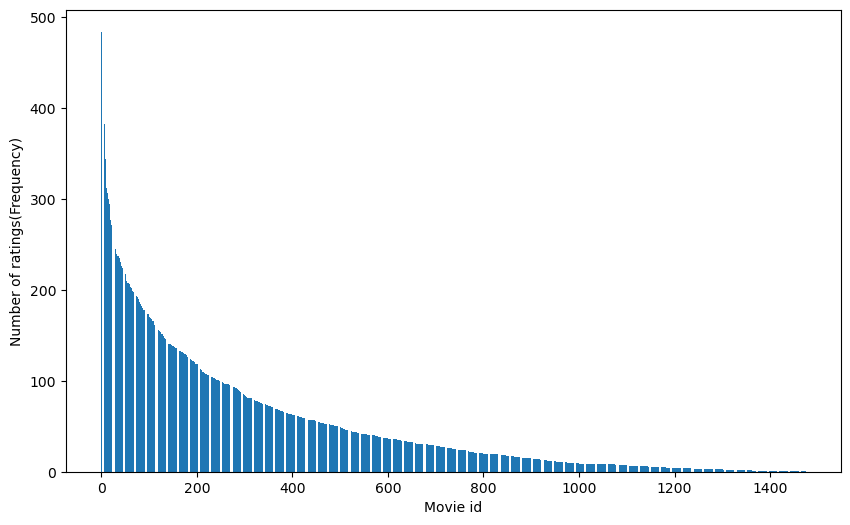

In [27]:
import matplotlib.pyplot as plt

item_counts = train_data_df['movie_id'].value_counts()
plt.figure(figsize=(10, 6))
plt.bar(range(len(item_counts)), item_counts.values)
plt.xlabel('Movie id')
plt.ylabel('Number of ratings(Frequency)')
plt.show()

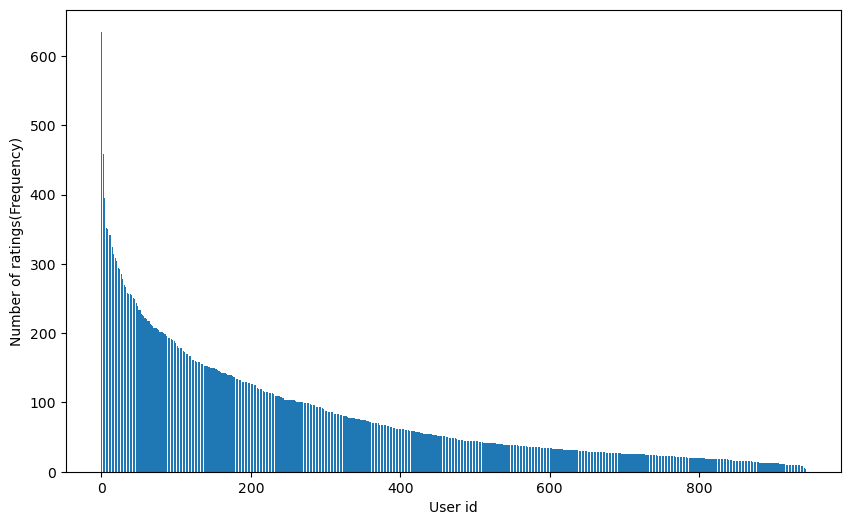

In [28]:
user_counts = train_data_df['user_id'].value_counts()
plt.figure(figsize=(10, 6))
plt.bar(range(len(user_counts)), user_counts.values)
plt.xlabel('User id')
plt.ylabel('Number of ratings(Frequency)')
plt.show()

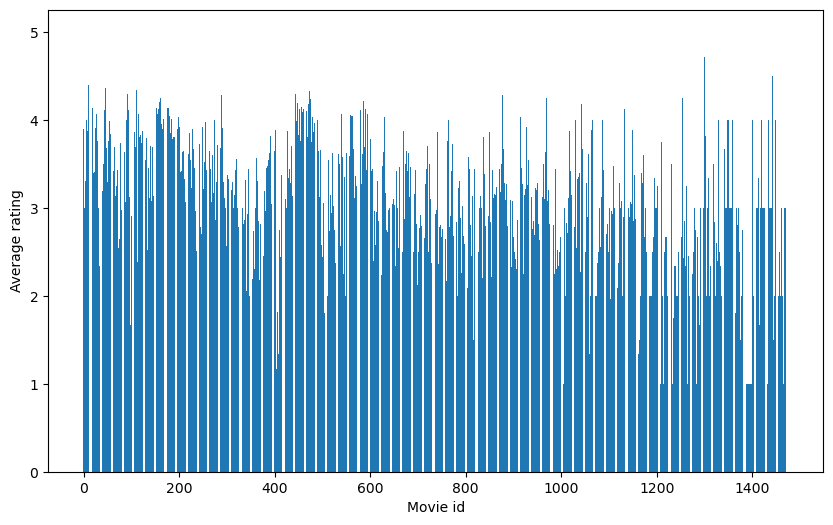

In [29]:
movie_ratings = train_data_df.groupby('movie_id')['rating'].mean()

plt.figure(figsize=(10, 6))
plt.bar(range(len(movie_ratings)), movie_ratings.values)
plt.xlabel('Movie id')
plt.ylabel('Average rating')
plt.show()

- Compute the frequency of movies that were rated highly, i.e., rating 3-5.
How many times was each movie rated highly by user?

In [30]:
high_ratings = train_data_df[train_data_df['rating'].isin([3, 4, 5])]
freq_high_ratings = high_ratings.groupby('id_in_movielens')['rating'].count()

print(freq_high_ratings)
print(len(freq_high_ratings))

id_in_movielens
1       353
2        84
3        47
4       144
5        56
       ... 
1674      1
1675      1
1677      1
1679      1
1682      1
Name: rating, Length: 1394, dtype: int64
1394


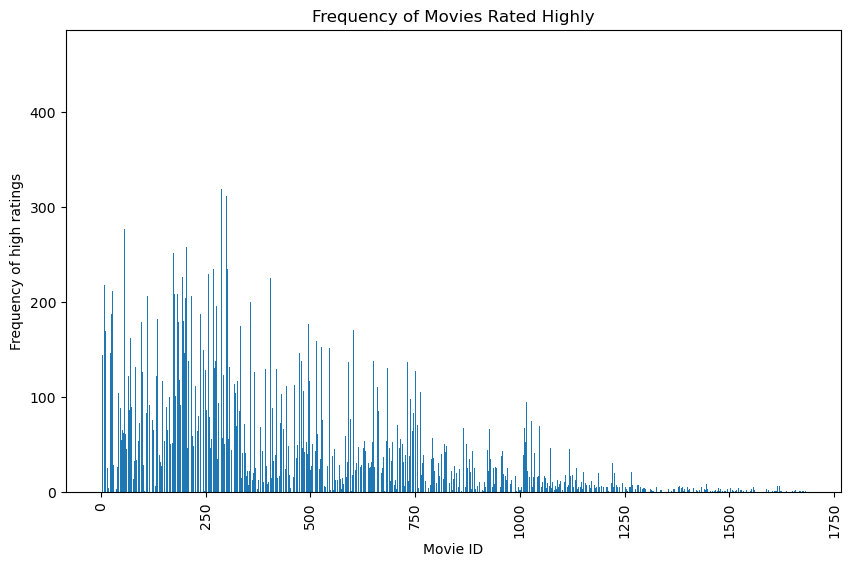

In [31]:
fig, ax = plt.subplots(figsize=(10,6))
ax.bar(freq_high_ratings.index, freq_high_ratings.values)

ax.set_xlabel('Movie ID')
ax.set_ylabel('Frequency of high ratings')
ax.set_title('Frequency of Movies Rated Highly')

plt.xticks(rotation=90)
plt.show()

# 2) Week 7

- Based on the frequency of highly-rated movies computed in Week 6, implement the TopPop recommender system, which should recommend the top-k movies with high ratings in the training split, train.data.

In [32]:
freq_high_ratings = {k: v if v is not None else 0 for k, v in freq_high_ratings.items()}

def top_pop_recommendations(freq_high_ratings, k=10):
    sorted_movies = sorted(freq_high_ratings, key=freq_high_ratings.get, reverse=True)
    recommended_movies = sorted_movies[:k]

    return recommended_movies

recommended_movies = top_pop_recommendations( freq_high_ratings, k=5)
print(recommended_movies)

[50, 181, 100, 258, 1]


- Choose at least one neighborhood-based model and one latent factor model that uses the observed user-item ratings in the training set to predict the unobserved ratings. Report your choice of models

In [33]:
train_data_df

user_id  movie_id  rating  timestamp  id_in_movielens  id_in_metadata  \
0            1         1       5  874965758                1             862   
1            2         1       4  888550871                1             862   
2            6         1       4  883599478                1             862   
3           13         1       3  882140487                1             862   
4           16         1       5  877717833                1             862   
...        ...       ...     ...        ...              ...             ...   
75438      851      1676       2  875731674             1676           59232   
75439      854      1677       3  882814368             1677          124851   
75440      863      1679       3  889289491             1679            2923   
75441      863      1680       2  889289570             1680           10215   
75442      916      1682       3  880845755             1682           88893   

       adult                              belongs_to_collection    budget  \
0      False  {'id': 10194, 'name': 'Toy Story Collection', ...  30000000   
1      False  {'id': 10194, 'name': 'Toy Story Collection', ...  30000000   
2      False  {'id': 10194, 'name': 'Toy Story Collection', ...  30000000   
3      False  {'id': 10194, 'name': 'Toy Story Collection', ...  30000000   
4      False  {'id': 10194, 'name': 'Toy Story Collection', ...  30000000   
...      ...                                                ...       ...   
75438  False                                                NaN         0   
75439  False                                                NaN         0   
75440  False                                                NaN         0   
75441  False                                                NaN   6000000   
75442  False                                                NaN         0   

                                                  genres  ... release_date  \
0      [{'id': 16, 'name': 'Animation'}, {'id': 35, '...  ...   1995-10-30   
1      [{'id': 16, 'name': 'Animation'}, {'id': 35, '...  ...   1995-10-30   
2      [{'id': 16, 'name': 'Animation'}, {'id': 35, '...  ...   1995-10-30   
3      [{'id': 16, 'name': 'Animation'}, {'id': 35, '...  ...   1995-10-30   
4      [{'id': 16, 'name': 'Animation'}, {'id': 35, '...  ...   1995-10-30   
...                                                  ...  ...          ...   
75438                      [{'id': 18, 'name': 'Drama'}]  ...   1996-11-20   
75439                                                 []  ...   1995-06-08   
75440  [{'id': 10749, 'name': 'Romance'}, {'id': 80, ...  ...   1998-11-07   
75441  [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...  ...   1998-04-23   
75442  [{'id': 12, 'name': 'Adventure'}, {'id': 18, '...  ...   1991-01-01   

           revenue runtime                                   spoken_languages  \
0      373554033.0    81.0           [{'iso_639_1': 'en', 'name': 'English'}]   
1      373554033.0    81.0           [{'iso_639_1': 'en', 'name': 'English'}]   
2      373554033.0    81.0           [{'iso_639_1': 'en', 'name': 'English'}]   
3      373554033.0    81.0           [{'iso_639_1': 'en', 'name': 'English'}]   
4      373554033.0    81.0           [{'iso_639_1': 'en', 'name': 'English'}]   
...            ...     ...                                                ...   
75438          0.0   119.0           [{'iso_639_1': 'en', 'name': 'English'}]   
75439          0.0    89.0                                                 []   
75440          0.0    94.0  [{'iso_639_1': 'fr', 'name': 'Français'}, {'is...   
75441   58000000.0    99.0           [{'iso_639_1': 'en', 'name': 'English'}]   
75442          0.0   105.0  [{'iso_639_1': 'it', 'name': 'Italiano'}, {'is...   

         status                                            tagline  \
0      Released                                                NaN   
1      Released                                                NaN   
2

- Use 5-fold cross-validation on the training set to tune the hyperparameters of the chosen models (similarity measure and number of neighbors for the neighborhood-based model; number of latent factors and number of epochs for the latent factor model).


In [34]:
from surprise import KNNBasic
from surprise import SVD
from surprise import Dataset
from surprise import Reader
from surprise import accuracy
from surprise.model_selection import GridSearchCV

In [157]:
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(train_data_df[['user_id', 'movie_id', 'rating']], reader)

param_grid = {'sim_options': {'name': ['cosine', 'msd', 'pearson'],
                              'user_based': [True],
                              'min_support': [1, 5, 10],
                              'shrinkage': [0, 50, 100]}}

gs = GridSearchCV(KNNBasic, param_grid, measures=['rmse', 'mae'], cv=5)
gs.fit(data)

print(gs.best_params['rmse'])
print(gs.best_score['rmse'])

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing th

In [158]:
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(train_data_df[['user_id', 'movie_id', 'rating']], reader)

param_grid = {'n_factors': [50, 100, 150],
              'n_epochs': [10, 20, 30],
              'lr_all': [0.002, 0.005, 0.01],
              'reg_all': [0.02, 0.1, 0.2]}

gs = GridSearchCV(SVD, param_grid, measures=['rmse', 'mae'], cv=5)
gs.fit(data)

print(gs.best_params['rmse'])
print(gs.best_score['rmse'])

{'n_factors': 150, 'n_epochs': 30, 'lr_all': 0.01, 'reg_all': 0.1}
0.9201645865705453
{'n_factors': 150, 'n_epochs': 30, 'lr_all': 0.01, 'reg_all': 0.1}
0.9194313745675335


- Run the models with the optimal hyperparameters to the whole training
set.

In [35]:
from surprise import KNNWithMeans
reader = Reader(rating_scale=(1, 5))
train_data = Dataset.load_from_df(train_data_df[['user_id', 'movie_id', 'rating']], reader)
train_set = train_data.build_full_trainset()

knn_model = KNNWithMeans(k=10,
                         sim_options={'name': 'msd', 'user_based': True, 'min_support': 5, 'shrinkage': 0})
knn_model.fit(train_set)

svd_model = SVD(n_factors=150, n_epochs=30, lr_all=0.01, reg_all=0.1)
svd_model.fit(train_set)

test_set = train_set.build_anti_testset()
knn_predictions = knn_model.test(test_set)
svd_predictions = svd_model.test(test_set)

knn_rmse = accuracy.rmse(knn_predictions)
svd_rmse = accuracy.rmse(svd_predictions)

print('KNN RMSE on test set:', knn_rmse)
print('SVD RMSE on test set:', svd_rmse)

Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.8083
RMSE: 0.6120
KNN RMSE on test set: 0.8083361528783415
SVD RMSE on test set: 0.6120192112515092


- Use the final models to rank the non-rated items for each user

In [36]:
user_ratings_user_based = {}
user_ratings_svd = {}

for user in test_users:
    train_ratings = test_data_df[test_data_df['user_id']==user]

    unrated_items = list(set(test_data_df['movie_id']) - set(train_ratings['movie_id']))

    unrated_ratings_svd = [svd_model.predict(user, item).est for item in unrated_items]
    unrated_ratings_user_based = [knn_model.predict(user, item).est for item in unrated_items]

    user_ratings_user_based[user] = pd.DataFrame({'movie_id': unrated_items, 'predicted_rating': unrated_ratings_user_based})
    user_ratings_svd[user] = pd.DataFrame({'movie_id': unrated_items, 'predicted_rating': unrated_ratings_svd})

    user_ratings_user_based[user] = user_ratings_user_based[user].sort_values(by=['predicted_rating'], ascending=False)
    user_ratings_svd[user] = user_ratings_svd[user].sort_values(by=['predicted_rating'], ascending=False)

In [37]:
print(user_ratings_user_based[10])
print(user_ratings_svd[10])

      movie_id  predicted_rating
39          50          5.000000
332        408          5.000000
1097      1367          5.000000
253        320          5.000000
1098      1368          5.000000
...        ...               ...
1022      1250          2.109862
208        263          2.103033
726        891          2.056448
193        247          1.899214
1070      1316          1.591637

[1201 rows x 2 columns]
      movie_id  predicted_rating
1150      1449          4.922378
251        318          4.836755
332        408          4.797388
133        169          4.757542
7           12          4.731138
...        ...               ...
370        457          2.534666
725        890          2.525765
796        976          2.514731
1081      1336          2.508202
297        368          2.462343

[1201 rows x 2 columns]


## 3) Week 8

- Measure the error of the system’s predicted ratings for the movies (Root Mean Square Error, RMSE)

In [40]:
import numpy as np


test_data = Dataset.load_from_df(test_data_df[['user_id', 'movie_id', 'rating']], reader)
test_set = test_data.build_full_trainset().build_anti_testset()

test_preds = svd_model.test(test_set)



In [42]:
from surprise.accuracy import rmse
svd_rmse_test= rmse(test_preds)
print("RMSE for SVD",svd_rmse_test)

RMSE: 0.6149
RMSE for SVD 0.6148690568594423


In [43]:
test_preds_neighbor = knn_model.test(test_set)

knn_rmse_test= rmse(test_preds_neighbor)
print("RMSE for KNN",knn_rmse_test)

RMSE: 0.7688
RMSE for KNN 0.7687921981860286


To evaluate this, generate the top-k (with k = 5) recommendation for each test user. Based on the top-k recommendation list
generated for each user, and using only ratings ≥ 3 in the test data split compute:

In [44]:
def get_top_k_recommendations(user_ratings, k):
    top_k_recommendations = {}

    for user, ratings_df in user_ratings.items():
        top_k = list(ratings_df.head(k)['movie_id'])
        top_k_recommendations[user] = top_k

    return top_k_recommendations

In [45]:
user_topK_recommendations_user_based =   get_top_k_recommendations(user_ratings_user_based ,5)

In [46]:
user_topK_recommendations_user_based

{1: [1368, 1449, 1500, 246, 913],
 2: [1449, 1500, 515, 913, 357],
 3: [1367, 1449, 1347, 346, 320],
 4: [1, 1368, 117, 520, 324],
 5: [1367, 1347, 1500, 1449, 174],
 6: [1368, 1500, 1449, 132, 913],
 7: [1449, 1500, 913, 50, 9],
 8: [1367, 1449, 867, 1500, 1131],
 9: [313, 1269, 195, 64, 202],
 10: [50, 408, 1367, 320, 1368],
 11: [1500, 1449, 659, 1368, 913],
 12: [98, 1142, 165, 265, 60],
 13: [408, 867, 1500, 285, 1449],
 14: [512, 867, 1500, 119, 1368],
 15: [1347, 1449, 1500, 12, 913],
 16: [1, 173, 273, 1449, 272],
 17: [1347, 12, 1449, 1043, 169],
 18: [1368, 1449, 100, 913, 1500],
 19: [1368, 1449, 1269, 854, 853],
 20: [1367, 1449, 867, 1500, 913],
 21: [9, 1500, 1449, 127, 408],
 22: [1367, 1347, 1142, 1368, 1500],
 23: [1368, 1367, 1500, 1449, 100],
 24: [187, 276, 272, 251, 515],
 25: [1, 1189, 1449, 204, 867],
 26: [1347, 302, 318, 64, 313],
 27: [1368, 854, 853, 1347, 1131],
 28: [1347, 1367, 1500, 1449, 56],
 29: [42, 483, 246, 1347, 268],
 30: [1368, 1449, 867, 313, 13

In [47]:
user_topK_recommendations_svd = get_top_k_recommendations(user_ratings_svd ,5)

In [48]:
user_topK_recommendations_svd

{1: [1449, 169, 127, 408, 178],
 2: [1449, 408, 169, 285, 302],
 3: [320, 346, 408, 56, 483],
 4: [867, 1194, 474, 302, 169],
 5: [1449, 169, 408, 172, 641],
 6: [1449, 474, 169, 603, 493],
 7: [1449, 318, 408, 357, 320],
 8: [1449, 867, 318, 313, 12],
 9: [1449, 169, 318, 357, 483],
 10: [1449, 318, 408, 169, 12],
 11: [1449, 318, 483, 408, 169],
 12: [1449, 169, 64, 12, 963],
 13: [511, 408, 199, 867, 909],
 14: [1449, 12, 169, 921, 318],
 15: [408, 936, 318, 50, 427],
 16: [50, 483, 169, 12, 480],
 17: [408, 12, 169, 483, 50],
 18: [1449, 100, 320, 963, 427],
 19: [1449, 408, 318, 169, 1131],
 20: [1449, 169, 408, 1131, 22],
 21: [408, 1449, 656, 187, 854],
 22: [318, 178, 187, 483, 127],
 23: [408, 1449, 169, 320, 474],
 24: [1449, 169, 357, 408, 12],
 25: [1449, 408, 318, 64, 483],
 26: [1449, 408, 169, 483, 318],
 27: [1524, 1449, 483, 603, 1131],
 28: [169, 318, 408, 64, 483],
 29: [1449, 318, 483, 474, 408],
 30: [1449, 169, 318, 408, 867],
 31: [408, 1449, 169, 1019, 483],
 32

 - Hit rate, averaged across users

In [49]:
user_recommendations_user_based = {}
user_recommendations_svd = {}

for user in test_users:
    train_ratings = train_data_df[train_data_df['user_id']==user]

    unrated_items = list(set(train_data_df['movie_id']) - set(train_ratings['movie_id']))

    unrated_ratings_user_based = [knn_model.predict(user, item).est for item in unrated_items]
    unrated_ratings_svd = [svd_model.predict(user, item).est for item in unrated_items]

    predicted_ratings_user_based = pd.DataFrame({'movie_id': unrated_items, 'predicted_rating': unrated_ratings_user_based})
    predicted_ratings_svd = pd.DataFrame({'movie_id': unrated_items, 'predicted_rating': unrated_ratings_svd})

    top_k_user_based = predicted_ratings_user_based.sort_values(by=['predicted_rating'], ascending=False)[:5]
    top_k_svd = predicted_ratings_svd.sort_values(by=['predicted_rating'], ascending=False)[:5]

    user_recommendations_user_based[user] = top_k_user_based
    user_recommendations_svd[user] = top_k_svd

In [52]:
hit_rates_user_based = []
hit_rates_svd = []

for user in test_users:

    user_test_ratings = test_data_df[test_data_df['user_id'] == user]
    user_test_ratings['rating'] = user_test_ratings['rating'].apply(lambda x: 1 if x >= 3 else 0)

    user_top_k_user_based = user_recommendations_user_based[user]['movie_id'].tolist()
    user_top_k_svd = user_recommendations_svd[user]['movie_id'].tolist()

    hits_user_based = user_test_ratings['movie_id'].isin(user_top_k_user_based).any()
    hits_svd = user_test_ratings['movie_id'].isin(user_top_k_svd).any()

    hit_rate_user_based = 1 if hits_user_based.any() else 0
    hit_rate_svd = 1 if hits_svd.any() else 0

    hit_rates_user_based.append(hit_rate_user_based)
    hit_rates_svd.append(hit_rate_svd)

avg_hit_rate_user_based = sum(hit_rates_user_based) / len(hit_rates_user_based)
avg_hit_rate_svd = sum(hit_rates_svd) / len(hit_rates_svd)



E:\Programe\Anaconda3\envs\web\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [53]:
hit_rates_top_pop = []
k=5
for user in test_users:

    user_test_ratings = test_data_df[test_data_df['user_id'] == user]
    user_test_ratings['rating'] = user_test_ratings['rating'].apply(lambda x: 1 if x >= 3 else 0)

    user_top_k = recommended_movies[:k]

    hits_top_pop = user_test_ratings['movie_id'].isin(user_top_k).any()

    hit_rate_top_pop = 1 if hits_top_pop.any() else 0
    hit_rates_top_pop.append(hit_rate_top_pop)

avg_hit_rate_top_pop = sum(hit_rates_top_pop) / len(hit_rates_top_pop)


E:\Programe\Anaconda3\envs\web\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == "__main__":


In [54]:
print("Average Hit rate (User-based CF): {:.2f}".format(avg_hit_rate_user_based))
print("Average Hit rate (SVD): {:.2f}".format(avg_hit_rate_svd))
print("Average Hit rate (TopPop): {:.2f}".format(avg_hit_rate_top_pop))

Average Hit rate (User-based CF): 0.07
Average Hit rate (SVD): 0.36
Average Hit rate (TopPop): 0.63


- Precision@k, averaged across users

In [55]:
def precision_at_k(user_recommendations, test_ratings, k):
    precision_sum = 0
    user_count = 0

    for user_id in user_recommendations.keys():
        user_top_k = user_recommendations[user_id][:k]

        user_test_ratings = test_ratings[test_ratings['user_id'] == user_id]

        user_test_ratings['rating'] = user_test_ratings['rating'].apply(lambda x: 1 if x >= 3 else 0)

        hits = user_top_k['movie_id'].isin(user_test_ratings['movie_id'][user_test_ratings['rating'] == 1]).sum()

        precision = hits / k
        precision_sum += precision

        user_count += 1

    avg_precision = precision_sum / user_count

    return avg_precision

In [56]:
precision_at_k_user_based = precision_at_k(user_recommendations_user_based, test_data_df, 5)
precision_at_k_svd = precision_at_k(user_recommendations_svd, test_data_df, 5)

E:\Programe\Anaconda3\envs\web\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


In [57]:
def precision_at_k_top_pop(recommended_movies, test_ratings, k):
    precision_sum = 0
    user_count = 0

    for user_id in test_ratings['user_id'].unique():
        user_top_k = recommended_movies[:k]

        user_test_ratings = test_ratings[test_ratings['user_id'] == user_id]

        user_test_ratings['rating'] = user_test_ratings['rating'].apply(lambda x: 1 if x >= 3 else 0)

        hits = set(user_top_k).intersection(set(user_test_ratings['movie_id'][user_test_ratings['rating'] == 1]))

        precision = len(hits) / k
        precision_sum += precision

        user_count += 1

    avg_precision = precision_sum / user_count

    return avg_precision

In [58]:
recommended_movies = top_pop_recommendations(freq_high_ratings, k=5)
precision_at_k_top_pop = precision_at_k_top_pop(recommended_movies, test_data_df, k=5)

E:\Programe\Anaconda3\envs\web\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


In [59]:
print("Precision@5 (User-based CF): {:.5f}".format(precision_at_k_user_based))
print("Precision@5 (SVD): {:.5f}".format(precision_at_k_svd))
print("Precision@5 (TopPop): {:.5f}".format(precision_at_k_top_pop))

Precision@5 (User-based CF): 0.01351
Precision@5 (SVD): 0.11460
Precision@5 (TopPop): 0.19259


- Mean Average Precision (MAP@k)

In [60]:
def mapk(recommended, true, k):
    if len(recommended) > k:
        recommended = recommended[:k]
    score = 0.0
    num_hits = 0.0
    for i, item in enumerate(recommended):
        if item in true and item not in recommended[:i]:
            num_hits += 1.0
            score += num_hits / (i + 1.0)
    if not true:
        return 0.0
    return score / min(len(true), k)

In [61]:

# convert test ratings to binary labels
test_labels = np.where(test_data_df['rating'] >= 3, 1, 0)

mapk_user_based = []
mapk_svd = []

for user in test_data_df['user_id'].unique():
    user_test_ratings = test_data_df[test_data_df['user_id'] == user]
    user_test_labels = test_labels[test_data_df['user_id'] == user]
    user_top_k_user_based = user_recommendations_user_based[user]
    user_top_k_svd = user_recommendations_svd[user]
    mapk_user_based.append(mapk(user_top_k_user_based['movie_id'].tolist(), np.where(user_test_labels == 1)[0].tolist(), 5))
    mapk_svd.append(mapk(user_top_k_svd['movie_id'].tolist(), np.where(user_test_labels == 1)[0].tolist(), 5))

avg_mapk_user_based = np.mean(mapk_user_based)
avg_mapk_svd = np.mean(mapk_svd)



In [62]:
#toppop sys
recommended_movies = top_pop_recommendations( freq_high_ratings, k=5)

k = 5
mapk_top_pop = []
for user in test_data_df['user_id'].unique():
    user_test_ratings = test_data_df[test_data_df['user_id'] == user]
    user_test_labels = test_labels[test_data_df['user_id'] == user]
    user_top_k = recommended_movies
    mapk_top_pop.append(mapk(user_top_k, np.where(user_test_labels == 1)[0].tolist(), k))

avg_mapk_top_pop = np.mean(mapk_top_pop)

In [63]:
print("Average MAP@5 (User-based CF): {:.5f}".format(avg_mapk_user_based))
print("Average MAP@5 (SVD): {:.5f}".format(avg_mapk_svd))
print("Average MAP@5 (TopPop): {:.5f}".format(avg_mapk_top_pop))

Average MAP@5 (User-based CF): 0.00424
Average MAP@5 (SVD): 0.01685
Average MAP@5 (TopPop): 0.10919


- Mean Reciprocal Rank (MRR@k)

In [64]:
def mrrk(recommended, true, k):
    if len(recommended) > k:
        recommended = recommended[:k]
    for i, item in enumerate(recommended):
        if item in true:
            return 1.0 / (i + 1.0)
    return 0.0

In [65]:
mrr_user_based = []
mrr_svd = []

for user in test_data_df['user_id'].unique():
    user_test_ratings = test_data_df[test_data_df['user_id'] == user]
    user_test_labels = test_labels[test_data_df['user_id'] == user]
    user_top_k_user_based = user_recommendations_user_based[user]
    user_top_k_svd = user_recommendations_svd[user]
    mrr_user_based.append(mrrk(user_top_k_user_based['movie_id'].tolist(), np.where(user_test_labels == 1)[0].tolist(), 5))
    mrr_svd.append(mrrk(user_top_k_svd['movie_id'].tolist(), np.where(user_test_labels == 1)[0].tolist(), 5))

avg_mrr_user_based = np.mean(mrr_user_based)
avg_mrr_svd = np.mean(mrr_svd)



In [66]:
#toppop sys
# calculate MRR@k for top-popularity recommender
mrr_top_pop = []
for user in test_data_df['user_id'].unique():
    user_test_labels = test_labels[test_data_df['user_id'] == user]
    user_top_k_top_pop = recommended_movies[:5]
    mrr_top_pop.append(mrrk(user_top_k_top_pop, np.where(user_test_labels == 1)[0].tolist(), 5))

avg_mrr_top_pop = np.mean(mrr_top_pop)


In [67]:
print("Average MRR@5 (User-based CF): {:.5f}".format(avg_mrr_user_based))
print("Average MRR@5 (SVD): {:.5f}".format(avg_mrr_svd))
print("Average MRR@5 (Top-Popularity): {:.5f}".format(avg_mrr_top_pop))

Average MRR@5 (User-based CF): 0.02121
Average MRR@5 (SVD): 0.07371
Average MRR@5 (Top-Popularity): 0.38250


- Coverage

In [68]:
#coverage for CF
test_items = test_data_df['movie_id'].unique()

user_based_items = set()
for user in user_recommendations_user_based:
    user_based_items.update(user_recommendations_user_based[user]['movie_id'])
svd_items = set()
for user in user_recommendations_svd:
    svd_items.update(user_recommendations_svd[user]['movie_id'])

coverage_user_based = len(user_based_items.intersection(test_items)) / len(test_items)
coverage_svd = len(svd_items.intersection(test_items)) / len(test_items)

In [69]:
#coverage toppop
unique_recommendations = set(recommended_movies)
num_movies = len(test_data_df['movie_id'].unique())
coverage = len(unique_recommendations) / num_movies * 100

In [70]:
print("Coverage (User-based CF): {:.2%}".format(coverage_user_based))
print("Coverage (SVD): {:.2%}".format(coverage_svd))
print("Coverage (TopPop): {:.2f}%".format(coverage))

Coverage (User-based CF): 12.75%
Coverage (SVD): 6.61%
Coverage (TopPop): 0.39%


Error Analysis for the neighborhood-based CF:

- Ordered by the value of the timestamp, take the first and last users from the test set as reference and retrieve the 10 nearest neighbours of each reference user. Print their rate history and analyse their predictions.


In [71]:
test_data_df.columns

Index(['user_id', 'movie_id', 'rating', 'timestamp', 'id_in_movielens',
       'id_in_metadata', 'adult', 'belongs_to_collection', 'budget', 'genres',
       'homepage', 'id', 'imdb_id', 'original_language', 'original_title',
       'overview', 'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count', 'rating_bin'],
      dtype='object')

In [72]:
testset_sorted = test_data_df.sort_values('timestamp')

first_user = testset_sorted['user_id'].iloc[0]
last_user = testset_sorted['user_id'].iloc[-1]

print("First user id:", first_user)
print("Last user id:", last_user)

First user id: 259
Last user id: 189


In [73]:
# retrieve the 10 nearest neighbors of each reference user
first_user_neighbors = knn_model.get_neighbors(first_user, k=10)
last_user_neighbors = knn_model.get_neighbors(last_user, k=10)


In [74]:
def get_rate_history(user_id,df):
    user_ratings = df[df['user_id'] == user_id]
    user_rate_history = {row['movie_id']: row['rating'] for index, row in user_ratings.iterrows()}
    return user_rate_history

In [75]:
print(f"Rate history of first user ({first_user}):")
print(get_rate_history(first_user,testset_sorted))
print("")

for neighbor in first_user_neighbors:
    print(f"Rate history of neighbor ({neighbor}):")
    print(get_rate_history(neighbor,testset_sorted))
    print("")

print(f"Rate history of last user ({last_user}):")
print(get_rate_history(last_user,testset_sorted))
print("")

for neighbor in last_user_neighbors:
    print(f"Rate history of neighbor ({neighbor}):")
    print(get_rate_history(neighbor,testset_sorted))
    print("")

Rate history of first user (259):
{255: 4, 108: 4, 772: 4, 117: 4, 200: 4, 405: 3, 176: 4, 210: 4, 357: 5, 317: 5, 98: 4, 12: 5, 269: 3, 180: 5, 313: 5, 235: 2, 762: 2, 750: 4, 959: 4}

Rate history of neighbor (132):
{275: 3, 124: 4, 137: 4, 922: 5}

Rate history of neighbor (203):
{294: 2, 326: 4, 321: 3, 271: 3, 304: 3, 332: 5, 336: 3, 181: 5, 24: 4, 1: 3, 619: 3, 7: 3, 471: 4, 250: 4, 248: 5, 148: 3, 117: 4, 50: 5, 282: 1, 93: 4}

Rate history of neighbor (315):
{302: 5, 269: 5, 127: 5, 187: 4, 48: 4, 508: 4, 651: 3, 531: 5, 285: 5, 223: 5, 46: 4, 180: 4, 194: 4, 8: 3, 100: 5, 238: 5, 17: 1, 211: 4, 168: 4, 186: 4, 216: 4, 746: 3, 792: 5, 13: 4, 709: 4, 732: 3, 654: 5, 504: 3, 98: 4, 12: 5, 156: 5, 603: 5, 185: 4, 657: 4, 31: 3, 431: 2, 230: 4, 234: 3, 273: 3, 340: 4, 305: 5}

Rate history of neighbor (285):
{269: 4, 313: 5, 538: 5, 682: 4, 288: 5, 902: 4, 628: 2, 150: 5, 237: 4, 276: 4, 191: 4, 514: 3, 168: 4, 216: 3}

Rate history of neighbor (218):
{430: 3, 208: 3, 194: 3, 209: 

In [76]:
from collections import defaultdict

# Define a function to get the predictions of a user and their neighbors
def get_predictions(user_id, neighbors, df, model):
    predictions = defaultdict(list)
    for neighbor in neighbors:
        movie_ids = df[df['user_id'] == neighbor]['movie_id']
        for movie_id in movie_ids:
            prediction = model.predict(user_id, movie_id)
            predictions[movie_id].append((neighbor, prediction.est))
    return predictions

# Get the predictions for the first user and their neighbors
first_user_predictions = get_predictions(first_user, first_user_neighbors, testset_sorted, knn_model)

# Print the predictions for each movie
print("Predictions for the first user and their neighbors")
for movie_id, predictions in first_user_predictions.items():
    print(f"Predictions for movie {movie_id}:")
    for neighbor, prediction in predictions:
        print(f"\tNeighbor ({neighbor}): {prediction}")
    print("")

# Get the predictions for the last user and their neighbors
last_user_predictions = get_predictions(last_user, last_user_neighbors, testset_sorted, knn_model)
print("Predictions for the last user and their neighbors")
# Print the predictions for each movie
for movie_id, predictions in last_user_predictions.items():
    print(f"Predictions for movie {movie_id}:")
    for neighbor, prediction in predictions:
        print(f"\tNeighbor ({neighbor}): {prediction}")
    print("")


Predictions for the first user and their neighbors
Predictions for movie 275:
	Neighbor (132): 4.120663791977552

Predictions for movie 124:
	Neighbor (132): 4.031142393724045

Predictions for movie 137:
	Neighbor (132): 3.733687882191544
	Neighbor (382): 3.733687882191544

Predictions for movie 922:
	Neighbor (132): 4.392048402091512
	Neighbor (334): 4.392048402091512

Predictions for movie 294:
	Neighbor (203): 3.179476800638337

Predictions for movie 326:
	Neighbor (203): 3.448790470668273
	Neighbor (334): 3.448790470668273

Predictions for movie 321:
	Neighbor (203): 3.0452091018852094

Predictions for movie 271:
	Neighbor (203): 3.2529701957910797

Predictions for movie 304:
	Neighbor (203): 3.6581598294558964

Predictions for movie 332:
	Neighbor (203): 3.566319429028197

Predictions for movie 336:
	Neighbor (203): 3.1043205376872365

Predictions for movie 181:
	Neighbor (203): 4.047130075349116

Predictions for movie 24:
	Neighbor (203): 3.6552222892734925

Predictions for movie

- For those users or movies that your model performs poorly on (RR ≤ 0.05), discuss the potential reasons behind.

## 4) Week 9 [Feb 27 - Mar 5]: Text Representation


In this part, we will work with the text content from the dataset and will apply NLP techniques to represent movies and users in a vector space.

- Select the column overview from the metadata file and apply the following preprocessing to clean up the data: tokenization, transform to lowercase, remove stopwords, stemming. Report the vocabulary size after preprocessing. There are many libraries you can use, including but not limited to, NLTK, spaCy or CoreNLP (requires Java).

In [81]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

In [82]:
total_items = len(metadata['overview'])
print(f'Total number of items: {total_items}')

Total number of items: 45463


In [319]:
#remove nan values
metadata_clean = metadata.dropna(subset=['overview'])
merged_data_ok_clean = merged_data_ok.dropna(subset=['overview'])

In [323]:
merged_data_vocab_before = len(set(' '.join(merged_data_ok_clean['overview']).split()))
print(f'Vocabulary size before preprocessing: {merged_data_vocab_before}')

Vocabulary size before preprocessing: 15754


In [84]:
vocab_before = len(set(' '.join(metadata_clean['overview']).split()))

stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    text = text.lower()

    tokens = nltk.word_tokenize(text)

    stemmed_tokens = [stemmer.stem(token) for token in tokens if token not in stop_words]

    preprocessed_text = ' '.join(stemmed_tokens)

    return preprocessed_text

metadata_clean['overview'] = metadata_clean['overview'].apply(preprocess_text)

vocab_after = len(set(' '.join(metadata_clean['overview']).split()))
print(f'Vocabulary size before preprocessing: {vocab_before}')
print(f'Vocabulary size after preprocessing: {vocab_after}')

E:\Programe\Anaconda3\envs\web\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Vocabulary size before preprocessing: 172304
Vocabulary size after preprocessing: 70731


In [85]:
metadata_clean

adult                              belongs_to_collection    budget  \
0      False  {'id': 10194, 'name': 'Toy Story Collection', ...  30000000   
1      False                                                NaN  65000000   
2      False  {'id': 119050, 'name': 'Grumpy Old Men Collect...         0   
3      False                                                NaN  16000000   
4      False  {'id': 96871, 'name': 'Father of the Bride Col...         0   
...      ...                                                ...       ...   
45461  False                                                NaN         0   
45462  False                                                NaN         0   
45463  False                                                NaN         0   
45464  False                                                NaN         0   
45465  False                                                NaN         0   

                                                  genres  \
0      [{'id': 16, 'name': 'Animation'}, {'id': 35, '...   
1      [{'id': 12, 'name': 'Adventure'}, {'id': 14, '...   
2      [{'id': 10749, 'name': 'Romance'}, {'id': 35, ...   
3      [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...   
4                         [{'id': 35, 'name': 'Comedy'}]   
...                                                  ...   
45461  [{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...   
45462                      [{'id': 18, 'name': 'Drama'}]   
45463  [{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...   
45464                                                 []   
45465                                                 []   

                                   homepage      id    imdb_id  \
0      http://toystory.disney.com/toy-story     862  tt0114709   
1                                       NaN    8844  tt0113497   
2                                       NaN   15602  tt0113228   
3                                       NaN   31357  tt0114885   
4                                       NaN   11862  tt0113041   
...                                     ...     ...        ...   
45461  http://www.imdb.com/title/tt6209470/  439050  tt6209470   
45462                                   NaN  111109  tt2028550   
45463                                   NaN   67758  tt0303758   
45464                                   NaN  227506  tt0008536   
45465                                   NaN  461257  tt6980792   

      original_language               original_title  \
0                    en                    Toy Story   
1                    en                      Jumanji   
2                    en             Grumpier Old Men   
3                    en            Waiting to Exhale   
4                    en  Father of the Bride Part II   
...                 ...                          ...   
45461                fa                      رگ خواب   
45462                tl          Siglo ng Pagluluwal   
45463                en                     Betrayal   
45464                en          Satana likuyushchiy   
45465                en                     Queerama   

                                                overview  ... release_date  \
0      led woodi , andi 's toy live happili room andi...  ...   1995-10-30   
1      sibl judi peter discov enchant board game open...  ...   1995-12-15   
2      famili wed reignit ancient feud next-door neig...  ...   1995-12-22   
3      cheat , mistreat step , women hold breath , wa...  ...   1995-12-22   
4      georg bank recov daughter 's wed , receiv news...  ...   1995-02-10   
...                                                  ...  ...          ...   
45461                              rise fall man woman .  ...          NaN   
45462  artist struggl finish work storylin cult play ...  ...   2011-11-17   
45463  one hit goe wrong , profession assassin end su...  ...   2003-08-01   
45464  small town live two brother , one minist one h...  ...   1917-10-21   
45465  50 year decriminalis homosexu 

- Represent each movie in the TF-IDF vector space. You can use your preferred library for data analysis, like, for example, scikit-learn or
gensim.

In [86]:
metadata_clean.columns = metadata_clean.columns.str.replace('id', 'metadata_id')

metadata_copy = metadata_clean.copy()
metadata_copy['metadata_id'] = metadata_copy['metadata_id'].astype(int)
movie_data = pd.merge(metadata_copy, mapping_table, left_on="metadata_id", right_on="id_in_metadata")

In [87]:
movie_data

adult                              belongs_to_collection    budget  \
0     False  {'id': 10194, 'name': 'Toy Story Collection', ...  30000000   
1     False                                                NaN  65000000   
2     False  {'id': 119050, 'name': 'Grumpy Old Men Collect...         0   
3     False                                                NaN  16000000   
4     False  {'id': 96871, 'name': 'Father of the Bride Col...         0   
...     ...                                                ...       ...   
1489  False                                                NaN         0   
1490  False                                                NaN         0   
1491  False                                                NaN         0   
1492  False  {'id': 464784, 'name': 'The Water of the Hills...         0   
1493  False                                                NaN         0   

                                                 genres  \
0     [{'id': 16, 'name': 'Animation'}, {'id': 35, '...   
1     [{'id': 12, 'name': 'Adventure'}, {'id': 14, '...   
2     [{'id': 10749, 'name': 'Romance'}, {'id': 35, ...   
3     [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...   
4                        [{'id': 35, 'name': 'Comedy'}]   
...                                                 ...   
1489  [{'id': 27, 'name': 'Horror'}, {'id': 10770, '...   
1490                                                 []   
1491  [{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...   
1492                      [{'id': 18, 'name': 'Drama'}]   
1493  [{'id': 80, 'name': 'Crime'}, {'id': 18, 'name...   

                                  homepage  metadata_id imdb_metadata_id  \
0     http://toystory.disney.com/toy-story          862        tt0114709   
1                                      NaN         8844        tt0113497   
2                                      NaN        15602        tt0113228   
3                                      NaN        31357        tt0114885   
4                                      NaN        11862        tt0113041   
...                                    ...          ...              ...   
1489                                   NaN        86889        tt0070003   
1490                                   NaN        87169        tt0110400   
1491                                   NaN        51043        tt0113682   
1492                                   NaN        65703        tt0044883   
1493                                   NaN       210653        tt0043647   

     original_language               original_title  \
0                   en                    Toy Story   
1                   en                      Jumanji   
2                   en             Grumpier Old Men   
3                   en            Waiting to Exhale   
4                   en  Father of the Bride Part II   
...                ...                          ...   
1489                en        Bram Stoker's Dracula   
1490                en                 The Low Life   
1491                en                    Loch Ness   
1492                fr            Manon des sources   
1493                es         El Hombre Sin Rostro   

                                               overview  ... runtime  \
0     led woodi , andi 's toy live happili room andi...  ...    81.0   
1     sibl judi peter discov enchant board game open...  ...   104.0   
2     famili wed reignit ancient feud next-door neig...  ...   101.0   
3     cheat , mistreat step , women hold breath , wa...  ...   127.0   
4     georg bank recov daughter 's wed , receiv news...  ...   106.0   
...                                                 ...  ...     ...   
1489    dracula search woman look like long dead wife .  ...   100.0   
1490  john came hollywood get one big break life . y...  ...    96.0   
1491  dr. dempsey american scientist becom skeptic ....  ...   101.0   
1492  marcel pagnol 's adapt novel manon de sourc , ...  ...   225.0   
1493  faceless kil

In [314]:
movie_data_vocab_after = len(set(' '.join(movie_data['overview']).split()))
print(f'Vocabulary size after preprocessing: {movie_data_vocab_after}')

Vocabulary size after preprocessing: 9559


In [328]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()

tfidf_matrix = tfidf_vectorizer.fit_transform(movie_data['overview'])

print(tfidf_matrix.shape)

(1494, 9065)


In [89]:
#display tfidf_matrix
tfidf_matrix_dense = tfidf_matrix.toarray()

df = pd.DataFrame(tfidf_matrix_dense, columns=tfidf_vectorizer.get_feature_names_out())

df

000  007   10  100  101  10th   11   12  125th  12th  ...  zombi  zone  \
0     0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0    0.0   0.0  ...    0.0   0.0   
1     0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0    0.0   0.0  ...    0.0   0.0   
2     0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0    0.0   0.0  ...    0.0   0.0   
3     0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0    0.0   0.0  ...    0.0   0.0   
4     0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0    0.0   0.0  ...    0.0   0.0   
...   ...  ...  ...  ...  ...   ...  ...  ...    ...   ...  ...    ...   ...   
1489  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0    0.0   0.0  ...    0.0   0.0   
1490  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0    0.0   0.0  ...    0.0   0.0   
1491  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0    0.0   0.0  ...    0.0   0.0   
1492  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0    0.0   0.0  ...    0.0   0.0   
1493  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0    0.0   0.0  ...    0.0   0.0   

      zoo  zookeep  zoologist  zord  zorro  zulu  zyto  état  
0     0.0      0.0        0.0   0.0    0.0   0.0   0.0   0.0  
1     0.0      0.0        0.0   0.0    0.0   0.0   0.0   0.0  
2     0.0      0.0        0.0   0.0    0.0   0.0   0.0   0.0  
3     0.0      0.0        0.0   0.0    0.0   0.0   0.0   0.0  
4     0.0      0.0        0.0   0.0    0.0   0.0   0.0   0.0  
...   ...      ...        ...   ...    ...   ...   ...   ...  
1489  0.0      0.0        0.0   0.0    0.0   0.0   0.0   0.0  
1490  0.0      0.0        0.0   0.0    0.0   0.0   0.0   0.0  
1491  0.0      0.0        0.0   0.0    0.0   0.0   0.0   0.0  
1492  0.0      0.0        0.0   0.0    0.0   0.0   0.0   0.0  
1493  0.0      0.0        0.0   0.0    0.0   0.0   0.0   0.0  

[1494 rows x 9065 columns]

- Represent each movie using pretrained word embeddings (e.g., GloVe, word2vec).

In [90]:
metadata_clean

adult                              belongs_to_collection    budget  \
0      False  {'id': 10194, 'name': 'Toy Story Collection', ...  30000000   
1      False                                                NaN  65000000   
2      False  {'id': 119050, 'name': 'Grumpy Old Men Collect...         0   
3      False                                                NaN  16000000   
4      False  {'id': 96871, 'name': 'Father of the Bride Col...         0   
...      ...                                                ...       ...   
45461  False                                                NaN         0   
45462  False                                                NaN         0   
45463  False                                                NaN         0   
45464  False                                                NaN         0   
45465  False                                                NaN         0   

                                                  genres  \
0      [{'id': 16, 'name': 'Animation'}, {'id': 35, '...   
1      [{'id': 12, 'name': 'Adventure'}, {'id': 14, '...   
2      [{'id': 10749, 'name': 'Romance'}, {'id': 35, ...   
3      [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...   
4                         [{'id': 35, 'name': 'Comedy'}]   
...                                                  ...   
45461  [{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...   
45462                      [{'id': 18, 'name': 'Drama'}]   
45463  [{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...   
45464                                                 []   
45465                                                 []   

                                   homepage metadata_id imdb_metadata_id  \
0      http://toystory.disney.com/toy-story         862        tt0114709   
1                                       NaN        8844        tt0113497   
2                                       NaN       15602        tt0113228   
3                                       NaN       31357        tt0114885   
4                                       NaN       11862        tt0113041   
...                                     ...         ...              ...   
45461  http://www.imdb.com/title/tt6209470/      439050        tt6209470   
45462                                   NaN      111109        tt2028550   
45463                                   NaN       67758        tt0303758   
45464                                   NaN      227506        tt0008536   
45465                                   NaN      461257        tt6980792   

      original_language               original_title  \
0                    en                    Toy Story   
1                    en                      Jumanji   
2                    en             Grumpier Old Men   
3                    en            Waiting to Exhale   
4                    en  Father of the Bride Part II   
...                 ...                          ...   
45461                fa                      رگ خواب   
45462                tl          Siglo ng Pagluluwal   
45463                en                     Betrayal   
45464                en          Satana likuyushchiy   
45465                en                     Queerama   

                                                overview  ... release_date  \
0      led woodi , andi 's toy live happili room andi...  ...   1995-10-30   
1      sibl judi peter discov enchant board game open...  ...   1995-12-15   
2      famili wed reignit ancient feud next-door neig...  ...   1995-12-22   
3      cheat , mistreat step , women hold breath , wa...  ...   1995-12-22   
4      georg bank recov daughter 's wed , receiv news...  ...   1995-02-10   
...                                                  ...  ...          ...   
45461                              rise fall man woman .  ...          NaN   
45462  artist struggl finish work storylin cult play ...  ...   2011-11-17   
45463  one hit goe wrong , profession assassin end su...  ...   2003-08-0

In [91]:
import gensim.downloader as api
glove_embedding_model = api.load("glove-wiki-gigaword-300")

In [95]:

# function to convert text to a vector for word embeddings
def text_to_vector(text):
    words = text.lower().split()
    vectors = [glove_embedding_model[w] for w in words if w in glove_embedding_model.key_to_index]
    if len(vectors) == 0:
        return np.zeros(300)
    else:
        return np.mean(vectors, axis=0)

movie_data["embedding"] = movie_data["overview"].apply(text_to_vector)

movie_embeddings = movie_data[["id_in_movielens", "embedding"]]

In [96]:
movie_embeddings

id_in_movielens                                          embedding
0                   1  [-0.10946303, 0.078197874, -0.02056392, -0.127...
1                 755  [-0.07720704, 0.06704256, -0.033654235, -0.098...
2                1028  [0.018259447, 0.061489996, 0.063034564, -0.048...
3                1311  [-0.074486144, -0.008508504, 0.010924811, -0.0...
4                 756  [-0.14021243, -0.09134251, -0.043068476, -0.05...
...               ...                                                ...
1489              217  [-0.31841668, -0.05600701, 0.01332767, -0.1249...
1490             1329  [-0.06209051, 0.13034874, -0.030291673, 0.1018...
1491              839  [-0.050440956, 0.05347763, -0.017222112, -0.03...
1492              166  [-0.035610523, 0.028492294, -0.07466405, -0.19...
1493              392  [-0.1402371, 0.13628922, -0.040712, 0.04809366...

[1494 rows x 2 columns]

In [97]:
movie_embeddings['embedding'][0]

array([-1.09463029e-01,  7.81978741e-02, -2.05639191e-02, -1.27132148e-01,
        1.90354083e-02,  6.41334429e-02, -1.92750376e-02,  1.53865904e-01,
        1.27750054e-01, -8.05647314e-01,  2.25481704e-01,  2.23635347e-04,
       -6.28875243e-03,  2.06476271e-01,  1.47705659e-01,  8.78323242e-02,
       -1.41794253e-02,  8.11555237e-02,  1.71463424e-03,  1.30435899e-01,
        2.45821550e-01,  2.09462672e-01,  1.04975209e-01,  5.54917790e-02,
       -1.40827626e-01, -5.46103120e-02,  6.88285455e-02, -4.78232652e-02,
       -4.24884558e-02, -4.08496819e-02, -3.02595198e-02,  1.59713283e-01,
       -1.85172688e-02,  9.97798815e-02, -6.37291670e-01,  8.51311088e-02,
        1.77715917e-03,  7.50365108e-02, -8.34209193e-03, -3.68407480e-02,
        4.85783815e-02, -2.68896893e-02, -3.70635055e-02,  6.29590601e-02,
       -3.39834504e-02, -6.44686806e-04,  1.73333615e-01, -2.77736746e-02,
       -2.45659929e-02,  5.97488210e-02,  7.87667930e-02, -1.14500806e-01,
       -5.40434197e-02,  

- Explore the similarity between movies within the vector spaces by computing their cosine similarity. Compare results obtained with TF-IDF and the word embeddings. Discuss what you find.


In [98]:
from sklearn.metrics.pairwise import cosine_similarity

cos_sim_tfidf = cosine_similarity(tfidf_matrix)
print(cos_sim_tfidf)

[[1.         0.02442354 0.         ... 0.         0.         0.        ]
 [0.02442354 1.         0.04243148 ... 0.02399672 0.         0.        ]
 [0.         0.04243148 1.         ... 0.05605319 0.         0.        ]
 ...
 [0.         0.02399672 0.05605319 ... 1.         0.         0.        ]
 [0.         0.         0.         ... 0.         1.         0.        ]
 [0.         0.         0.         ... 0.         0.         1.        ]]


In [99]:
cos_sim_embedding = cosine_similarity(list(movie_embeddings['embedding']))
print(cos_sim_embedding)

[[1.         0.83947444 0.79715085 ... 0.8175576  0.6259571  0.6029959 ]
 [0.83947444 1.         0.8238467  ... 0.8765471  0.6306478  0.64319986]
 [0.79715085 0.8238467  0.99999976 ... 0.8696661  0.5988736  0.6120067 ]
 ...
 [0.8175576  0.8765471  0.8696661  ... 1.0000001  0.66331244 0.6749233 ]
 [0.6259571  0.6306478  0.5988736  ... 0.66331244 1.         0.49783015]
 [0.6029959  0.64319986 0.6120067  ... 0.6749233  0.49783015 1.        ]]


Compare the 2 cosine similarity matrix

In [100]:
from scipy.stats import pearsonr

cos_sim_tfidf_flat = cos_sim_tfidf.flatten()
cos_sim_embedding_flat = cos_sim_embedding.flatten()

In [101]:
print(len(cos_sim_tfidf_flat))
print(len(cos_sim_embedding_flat))

2232036
2232036


In [329]:
corr_coef, p_value = pearsonr(cos_sim_tfidf_flat, cos_sim_embedding_flat)

print(f"Pearson correlation coefficient: {corr_coef}")

Pearson correlation coefficient: 0.19067232588351563


# 5) Week 10: Content-Based Recommender System

- Transform the overview column of each item into a TF-IDF score or other numerical value, e.g., token-count based, that can represent the
summaries. Select other factors that can be used as item features, for example genres and production companies.

In [103]:
movie_data['overview_tfidf'] = tfidf_vectorizer.fit_transform(movie_data['overview']).toarray().tolist()

In [104]:
import ast

def extract_genres(row):
    genres = []
    for genre in ast.literal_eval(row['genres']):
        genres.append(genre['name'])
    return '|'.join(genres)

def extract_companies(row):
    companies = []
    for company in ast.literal_eval(row['production_companies']):
        companies.append(company['name'])
    return '|'.join(companies)

movie_data['genres'] = movie_data.apply(extract_genres, axis=1)
movie_data = movie_data.dropna(subset=['production_companies'])
movie_data['production_companies'] = movie_data.apply(extract_companies, axis=1)

In [105]:
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer()

genres_encoded = mlb.fit_transform(movie_data['genres'].apply(lambda x: x.split('|')))
movie_data = movie_data.join(pd.DataFrame(genres_encoded, columns=mlb.classes_).add_prefix('genre_'))

production_companies_encoded = mlb.fit_transform(movie_data['production_companies'].apply(lambda x: x.split('|')))
movie_data = movie_data.join(pd.DataFrame(production_companies_encoded, columns=mlb.classes_).add_prefix('production_company_'))


In [106]:
movie_data

adult                              belongs_to_collection    budget  \
0     False  {'id': 10194, 'name': 'Toy Story Collection', ...  30000000   
1     False                                                NaN  65000000   
2     False  {'id': 119050, 'name': 'Grumpy Old Men Collect...         0   
3     False                                                NaN  16000000   
4     False  {'id': 96871, 'name': 'Father of the Bride Col...         0   
...     ...                                                ...       ...   
1489  False                                                NaN         0   
1490  False                                                NaN         0   
1491  False                                                NaN         0   
1492  False  {'id': 464784, 'name': 'The Water of the Hills...         0   
1493  False                                                NaN         0   

                        genres                              homepage  \
0      Animation|Comedy|Family  http://toystory.disney.com/toy-story   
1     Adventure|Fantasy|Family                                   NaN   
2               Romance|Comedy                                   NaN   
3         Comedy|Drama|Romance                                   NaN   
4                       Comedy                                   NaN   
...                        ...                                   ...   
1489           Horror|TV Movie                                   NaN   
1490                                                             NaN   
1491              Drama|Family                                   NaN   
1492                     Drama                                   NaN   
1493        Crime|Drama|Horror                                   NaN   

      metadata_id imdb_metadata_id original_language  \
0             862        tt0114709                en   
1            8844        tt0113497                en   
2           15602        tt0113228                en   
3           31357        tt0114885                en   
4           11862        tt0113041                en   
...           ...              ...               ...   
1489        86889        tt0070003                en   
1490        87169        tt0110400                en   
1491        51043        tt0113682                en   
1492        65703        tt0044883                fr   
1493       210653        tt0043647                es   

                   original_title  \
0                       Toy Story   
1                         Jumanji   
2                Grumpier Old Men   
3               Waiting to Exhale   
4     Father of the Bride Part II   
...                           ...   
1489        Bram Stoker's Dracula   
1490                 The Low Life   
1491                    Loch Ness   
1492            Manon des sources   
1493         El Hombre Sin Rostro   

                                               overview  ...  \
0     led woodi , andi 's toy live happili room andi...  ...   
1     sibl judi peter discov enchant board game open...  ...   
2     famili wed reignit ancient feud next-door neig...  ...   
3     cheat , mistreat step , women hold breath , wa...  ...   
4     georg bank recov daughter 's wed , receiv news...  ...   
...                                                 ...  ...   
1489    dracula search woman look like long dead wife .  ...   
1490  john came hollywood get one big break life . y...  ...   
1491  dr. dempsey american scientist becom skeptic ....  ...   
1492  marcel pagnol 's adapt novel manon de sourc , ...  ...   
1493  faceless killer hunt women stop detect disturb...  ...   

     production_company_Zespół Filmowy TOR  \
0                                        0   
1                                        0   
2                                        0   
3                                        0   
4                                        0   
...                                    ...   
1489               

- After you represent each movie in a vector space, represent each user in the same vector space. This can be done by using an average of the items the user rates. Instead of a simple average, a weighted average can be used. Note: the user representations and item representations all have the same number of dimensions.


In [107]:
train_data_df_2 = pd.merge(train_data_df, movie_data, left_on="movie_id", right_on="id_in_movielens")

In [108]:
train_data_df_2

user_id  movie_id  rating  timestamp  id_in_movielens_x  \
0            1         1       5  874965758                  1   
1            2         1       4  888550871                  1   
2            6         1       4  883599478                  1   
3           13         1       3  882140487                  1   
4           16         1       5  877717833                  1   
...        ...       ...     ...        ...                ...   
75420      851      1676       2  875731674               1676   
75421      854      1677       3  882814368               1677   
75422      863      1679       3  889289491               1679   
75423      863      1680       2  889289570               1680   
75424      916      1682       3  880845755               1682   

       id_in_metadata_x adult_x  \
0                   862   False   
1                   862   False   
2                   862   False   
3                   862   False   
4                   862   False   
...                 ...     ...   
75420             59232   False   
75421            124851   False   
75422              2923   False   
75423             10215   False   
75424             88893   False   

                                 belongs_to_collection_x  budget_x  \
0      {'id': 10194, 'name': 'Toy Story Collection', ...  30000000   
1      {'id': 10194, 'name': 'Toy Story Collection', ...  30000000   
2      {'id': 10194, 'name': 'Toy Story Collection', ...  30000000   
3      {'id': 10194, 'name': 'Toy Story Collection', ...  30000000   
4      {'id': 10194, 'name': 'Toy Story Collection', ...  30000000   
...                                                  ...       ...   
75420                                                NaN         0   
75421                                                NaN         0   
75422                                                NaN         0   
75423                                                NaN   6000000   
75424                                                NaN         0   

                                                genres_x  ...  \
0      [{'id': 16, 'name': 'Animation'}, {'id': 35, '...  ...   
1      [{'id': 16, 'name': 'Animation'}, {'id': 35, '...  ...   
2      [{'id': 16, 'name': 'Animation'}, {'id': 35, '...  ...   
3      [{'id': 16, 'name': 'Animation'}, {'id': 35, '...  ...   
4      [{'id': 16, 'name': 'Animation'}, {'id': 35, '...  ...   
...                                                  ...  ...   
75420                      [{'id': 18, 'name': 'Drama'}]  ...   
75421                                                 []  ...   
75422  [{'id': 10749, 'name': 'Romance'}, {'id': 80, ...  ...   
75423  [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...  ...   
75424  [{'id': 12, 'name': 'Adventure'}, {'id': 18, '...  ...   

      production_company_Zespół Filmowy TOR  \
0                                         0   
1                                         0   
2                                         0   
3                                         0   
4                                         0   
...                                     ...   
75420                                     0   
75421                                     0   
75422                                     0   
75423                                     0   
75424                                     0   

       production_company_Zeta Entertainment  \
0                                          0   
1                                          0   
2                                          0   
3                                          0   
4                                          0   
...                                      ...   
75420                                      0   
75421                                      0   
75422                                      0   
75423                                      0   
75424                                      0   

      production_company_Zoet

In [313]:
user_item_matrix = train_data_df_2.pivot_table(index='user_id', columns='movie_id', values='rating', fill_value=0)
user_item_matrix

movie_id  1     2     3     4     5     7     8     9     10    11    ...  \
user_id                                                               ...   
1            5     3     4     3     3     4     1     5     0     2  ...   
2            4     0     0     0     0     0     0     0     2     0  ...   
3            0     0     0     0     0     0     0     0     0     0  ...   
4            0     0     0     0     0     0     0     0     0     4  ...   
5            0     0     0     0     0     0     0     0     0     0  ...   
...        ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   
939          0     0     0     0     0     0     0     5     0     0  ...   
940          0     0     0     2     0     4     5     3     0     0  ...   
941          5     0     0     0     0     4     0     0     0     0  ...   
942          0     0     0     0     0     0     0     0     0     0  ...   
943          0     5     0     0     0     0     0     3     0     4  ...   

movie_id  1671  1672  1673  1674  1675  1676  1677  1679  1680  1682  
user_id                                                               
1            0     0     0     0     0     0     0     0     0     0  
2            0     0     0     0     0     0     0     0     0     0  
3            0     0     0     0     0     0     0     0     0     0  
4            0     0     0     0     0     0     0     0     0     0  
5            0     0     0     0     0     0     0     0     0     0  
...        ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  
939          0     0     0     0     0     0     0     0     0     0  
940          0     0     0     0     0     0     0     0     0     0  
941          0     0     0     0     0     0     0     0     0     0  
942          0     0     0     0     0     0     0     0     0     0  
943          0     0     0     0     0     0     0     0     0     0  

[943 rows x 1469 columns]

In [114]:
user_matrix = np.zeros((len(user_item_matrix.index), tfidf_matrix.shape[1]))

for i, user_id in enumerate(user_item_matrix.index):

    user_ratings = user_item_matrix.loc[user_id].dropna()

    user_vector = np.zeros(tfidf_matrix.shape[1])
    total_weight = 0
    for movie_id, rating in user_ratings.iteritems():
        movie_index = movie_data[movie_data['id_in_movielens'] == movie_id].index[0]
        movie_vector = tfidf_matrix[movie_index].toarray()[0]
        user_vector += rating * movie_vector
        total_weight += rating

    user_vector /= total_weight
    user_matrix[i] = user_vector


In [115]:
user_matrix

array([[0.00161356, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.00864147, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.00192852, 0.        , 0.00445166, ..., 0.        , 0.        ,
        0.        ],
       [0.00251824, 0.        , 0.00389374, ..., 0.        , 0.        ,
        0.        ]])

- Calculate the user-item rating for an item by using a similarity metric between the user and the item. A similarity metric such as cosine distance or Euclidean distance can be used.

In [330]:
movie_id = 123

cos_sim = cosine_similarity(user_matrix, tfidf_matrix)
movie_similarities = cos_sim[:, movie_id]

user_item_matrix = user_item_matrix.replace(0, np.nan)

movie_users = user_item_matrix[movie_id].dropna().index

weighted_ratings = []
similarity_scores = []
for user_id in movie_users:
    user_similarity = movie_similarities[user_id-1]
    user_rating = user_item_matrix.loc[user_id, movie_id]
    weighted_ratings.append(user_similarity * user_rating)
    similarity_scores.append(user_similarity)

predicted_rating = np.sum(weighted_ratings) / np.sum(similarity_scores)
print(f"user-item rating for movie {movie_id}: {predicted_rating:.2f}")

user-item rating for movie 123: 3.22


- Report Precision@5, MAP@5, MRR@5, hit rate and coverage using ratings ≥ 3 in the test set. Compare the results with the models from previous
weeks.

Precision@5

In [117]:
test_data_df_2 = pd.merge(test_data_df, movie_data, left_on="movie_id", right_on="id_in_movielens")
test_data_df_2

user_id  movie_id  rating  timestamp  id_in_movielens_x  \
0            1        10       3  875693118                 10   
1            7        10       4  891352864                 10   
2           49        10       3  888066086                 10   
3           59        10       4  888203234                 10   
4          108        10       5  879879834                 10   
...        ...       ...     ...        ...                ...   
18840      411      1470       3  892845746               1470   
18841      436      1522       2  887771123               1522   
18842      437      1121       5  880140466               1121   
18843      440      1038       5  891550404               1038   
18844      450      1269       4  882812635               1269   

       id_in_metadata_x adult_x belongs_to_collection_x  budget_x  \
0                 31174   False                     NaN         0   
1                 31174   False                     NaN         0   
2                 31174   False                     NaN         0   
3                 31174   False                     NaN         0   
4                 31174   False                     NaN         0   
...                 ...     ...                     ...       ...   
18840             43475   False                     NaN         0   
18841             41590   False                     NaN         0   
18842              5967   False                     NaN         0   
18843             10871   False                     NaN  37000000   
18844             18299   False                     NaN         0   

                                                genres_x  ...  \
0      [{'id': 18, 'name': 'Drama'}, {'id': 10752, 'n...  ...   
1      [{'id': 18, 'name': 'Drama'}, {'id': 10752, 'n...  ...   
2      [{'id': 18, 'name': 'Drama'}, {'id': 10752, 'n...  ...   
3      [{'id': 18, 'name': 'Drama'}, {'id': 10752, 'n...  ...   
4      [{'id': 18, 'name': 'Drama'}, {'id': 10752, 'n...  ...   
...                                                  ...  ...   
18840  [{'id': 14, 'name': 'Fantasy'}, {'id': 16, 'na...  ...   
18841  [{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...  ...   
18842  [{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...  ...   
18843  [{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...  ...   
18844  [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...  ...   

      production_company_Zespół Filmowy TOR  \
0                                         0   
1                                         0   
2                                         0   
3                                         0   
4                                         0   
...                                     ...   
18840                                     0   
18841                                     0   
18842                                     0   
18843                                     0   
18844                                     0   

       production_company_Zeta Entertainment  \
0                                          0   
1                                          0   
2                                          0   
3                                          0   
4                                          0   
...                                      ...   
18840                                      0   
18841                                      0   
18842                                      0   
18843                                      0   
18844                                      0   

      production_company_Zoetrope Studios  \
0                                       0   
1                                       0   
2                                       0   
3                                       0   
4                                       0   
...                                   ...   
18840                                   0   
18841                                   0   
18842                                   0   
18843       

In [118]:
# It has only movies with rating >=3
test_data_df_3= test_data_df_2[test_data_df_2['rating'] >= 3]

In [119]:
user_movie_similarity = cosine_similarity(user_matrix, tfidf_matrix)

precision = 0

for user_id in test_data_df_3['user_id'].unique():

    user_test_movie_indices = list(test_data_df_3[test_data_df_3['user_id']==user_id]['movie_id'])

    user_similarity_scores = user_movie_similarity[user_id-1]

    top_5_movie_indices = user_similarity_scores.argsort()[::-1][:5]

    user_liked_movie_indices = [i for i in top_5_movie_indices if i in user_test_movie_indices]

    precision += len(user_liked_movie_indices)/5

precision = precision/len(test_data_df_3['user_id'].unique())

print(f"Precision@5 for Content-Based Recommender System: {precision}")

Precision@5 for Content-Based Recommender System: 0.022657952069716766


MAP@5

In [120]:
user_item_similarity = cosine_similarity(user_matrix, tfidf_matrix)

mapk_cb = []

for user_id in test_data_df_3['user_id'].unique():

    user_test_movie_indices = list(test_data_df_3[test_data_df_3['user_id']==user_id]['movie_id'])

    user_similarity_scores = user_item_similarity[user_id-1]

    top_5_movie_indices = user_similarity_scores.argsort()[::-1][:5]

    user_liked_movie_indices = [i for i in top_5_movie_indices if i in user_test_movie_indices]

    mapk_cb.append(mapk(top_5_movie_indices.tolist(), user_test_movie_indices, 5))

avg_mapk_cb = np.mean(mapk_cb)

print(f"MAP@5 for Content-Based Recommender System: {avg_mapk_cb}")


MAP@5 for Content-Based Recommender System: 0.01058097312999274


MRR@5

In [121]:
mrrk_cb = []
for user_id in test_data_df_3['user_id'].unique():
    user_test_movie_indices = list(test_data_df_3[test_data_df_3['user_id']==user_id]['movie_id'])

    user_similarity_scores = user_movie_similarity[user_id-1]

    top_5_movie_indices = user_similarity_scores.argsort()[::-1][:5]

    user_liked_movie_indices = [i for i in top_5_movie_indices if i in user_test_movie_indices]

    mrrk_cb.append(mrrk(top_5_movie_indices.tolist(), user_test_movie_indices, 5))

avg_mrrk_cb = np.mean(mrrk_cb)

print(f"MRR@5 for Content-Based Recommender System: {avg_mrrk_cb}")

MRR@5 for Content-Based Recommender System: 0.05094408133623819


Hit rate

In [122]:
hit_rate = 0

for user_id in test_data_df_3['user_id'].unique():
    user_liked_movie_indices = list(test_data_df_3[test_data_df_3['user_id']==user_id]['movie_id'])

    user_similarity_scores = user_movie_similarity[user_id-1]

    top_5_movie_indices = user_similarity_scores.argsort()[::-1][:5]

    user_liked_movie_indices = [i for i in top_5_movie_indices if i in user_liked_movie_indices]

    if len(user_liked_movie_indices) > 0:
        hit_rate += 1

hit_rate = hit_rate/len(test_data_df_3['user_id'].unique())

print(f"Hit rate for Content-Based Recommender System: {hit_rate}")

Hit rate for Content-Based Recommender System: 0.10893246187363835


coverage

In [331]:
user_recommendations_content_based = {}

for user_id, user_vector in enumerate(user_matrix):
    movie_similarities = cosine_similarity(user_vector.reshape(1, -1), tfidf_matrix)
    sorted_similarities = np.argsort(movie_similarities)[0][::-1]
    top_5_movie_indices = sorted_similarities[:5]
    movie_ids = [movie_data.iloc[idx]['id_in_movielens'] for idx in top_5_movie_indices]
    user_recommendations_content_based[user_id+1] = movie_ids

# calculate the coverage
num_items = len(movie_data['id_in_movielens'].unique())
recommended_items = set([movie_id for user in user_recommendations_content_based.values() for movie_id in user])
coverage = len(recommended_items) / num_items * 100
print("Coverage for Content-Based Recommender System:  {:.2f}%".format(coverage))

Coverage for Content-Based Recommender System:  38.35%


## 6) Week 11 Hybrid Recommender System

Create three hybrid recommender systems by combining the collaborative filtering model with the content-based model using the following three strategies:

1) Weighted strategy that re-ranks the items by combining the individual rankings from the two models with some aggregate function such as the sum, average, minimum or maximum.


In [286]:
alpha = 0.6
betha = 0.4

user_recommendations_hybrid_ws = {}

for user in user_recommendations_svd.keys():
    cf_recs = user_recommendations_svd[user]
    cb_recs = user_recommendations_content_based[user]

    merged_recs = set(cf_recs['movie_id']).union(set(cb_recs))
    recommendations = []
    for movie_id in merged_recs:
        cf_rating = cf_recs[cf_recs['movie_id'] == movie_id]['predicted_rating'].values
        cf_rating = cf_rating[0] if len(cf_rating) > 0 else 0
        cb_rating = 1 if movie_id in cb_recs else 0  # content-based model is binary
        weighted_rating = alpha * cf_rating + betha * cb_rating
        recommendations.append((movie_id, weighted_rating))
    recommendations = sorted(recommendations, key=lambda x: x[1], reverse=True)[:k]

    user_recommendations_hybrid_ws[user] = [rec[0] for rec in recommendations[:5]]


In [287]:
user_recommendations_hybrid_ws

{1: [1449, 408, 285, 357, 511],
 2: [1449, 408, 169, 12, 603],
 3: [408, 56, 483, 318, 357],
 4: [867, 357, 1449, 493, 408],
 5: [1449, 641, 199, 89, 513],
 6: [1449, 483, 603, 480, 318],
 7: [1449, 408, 320, 313, 483],
 8: [1449, 867, 318, 313, 12],
 9: [1449, 169, 318, 357, 1131],
 10: [1449, 318, 408, 483, 169],
 11: [1449, 483, 408, 169, 251],
 12: [1449, 318, 169, 64, 12],
 13: [408, 1449, 480, 168, 1367],
 14: [1449, 169, 474, 357, 318],
 15: [408, 318, 427, 1449, 169],
 16: [64, 483, 169, 174, 50],
 17: [408, 12, 169, 483, 50],
 18: [1449, 408, 169, 483, 320],
 19: [1449, 408, 318, 169, 1131],
 20: [1449, 169, 408, 1131, 1194],
 21: [1449, 187, 654, 169, 511],
 22: [318, 178, 483, 1449, 64],
 23: [1449, 169, 320, 474, 483],
 24: [1449, 169, 64, 408, 318],
 25: [1449, 169, 318, 64, 483],
 26: [1449, 408, 169, 483, 318],
 27: [1524, 1449, 483, 603, 1131],
 28: [169, 318, 12, 50, 408],
 29: [1449, 318, 483, 474, 408],
 30: [1449, 169, 318, 408, 867],
 31: [408, 1449, 169, 483, 641]

2. Switching strategy that uses the recommendations from the collaborative filtering model for some users and the recommendations from the contentbased model for other users chosen by a predefined condition.


In [288]:
import random as rand

# Define the Borda Count function
def borda_count(rankings):
    borda_scores = {}
    for ranking in rankings:
        for i, movie_id in enumerate(ranking):
            borda_scores[movie_id] = borda_scores.get(movie_id, 0) + len(ranking) - i - 1
    return sorted(borda_scores.items(), key=lambda x: x[1], reverse=True)

def calculate_points(borda_scores):
    points = {}
    for movie_id, score in borda_scores:
        points[movie_id] = points.get(movie_id, 0) + score
    result = [(movie_id, points.get(movie_id, 0)) for movie_id, score in borda_scores]
    result = sorted(result, key=lambda x: (x[1], x[0]), reverse=True)
    return result

#Create a variable that represents the number of times that the code should be run
random_run_time=int(rand.uniform(1, 100))
print(random_run_time)

user_recommendations_hybrid_ss = {}

for i in range(random_run_time):
    user_recommendations_hybrid_ss = {}
    for user in user_recommendations_svd.keys():
        cf_recs = user_recommendations_svd[user]
        cb_recs = user_recommendations_content_based[user]

        rankings = [cf_recs['movie_id'].tolist(), cb_recs]
        borda_scores = borda_count(rankings)
        points = calculate_points(borda_scores)
        hybrid_rec_user=[]
        for i in range( int(len(points)/2)):
            if points[2*i][1] == points[2*i+1][1]:
                if rand.random() < 0.5:
                    hybrid_rec_user.append((points[2*i][0]))
                else:
                    hybrid_rec_user.append((points[2*i+1][0]))
            else:
                hybrid_rec_user.append(points[2*i][0])
        user_recommendations_hybrid_ss[user] = hybrid_rec_user[:5]

5


In [289]:
user_recommendations_hybrid_ss

{1: [45, 246, 285, 127, 172],
 2: [1449, 408, 127, 275, 295],
 3: [408, 56, 340, 318, 357],
 4: [327, 357, 867, 362, 493],
 5: [1449, 641, 408, 89, 257],
 6: [132, 493, 603, 505, 318],
 7: [1449, 408, 620, 113, 483],
 8: [222, 867, 229, 227, 96],
 9: [385, 169, 318, 357, 371],
 10: [1449, 319, 408, 483, 694],
 11: [1449, 318, 423, 169, 251],
 12: [1449, 318, 4, 216, 12],
 13: [408, 428, 279, 1439, 1367],
 14: [923, 428, 474, 357, 318],
 15: [408, 318, 297, 303, 169],
 16: [483, 64, 50, 100, 11],
 17: [150, 12, 475, 483, 7],
 18: [1449, 408, 1439, 483, 512],
 19: [1449, 408, 325, 319, 202],
 20: [1449, 169, 174, 210, 1194],
 21: [1449, 187, 127, 169, 9],
 22: [318, 127, 187, 1449, 523],
 23: [1449, 169, 320, 474, 116],
 24: [11, 79, 64, 69, 655],
 25: [408, 169, 204, 64, 474],
 26: [1449, 408, 169, 483, 288],
 27: [1524, 1017, 483, 603, 286],
 28: [169, 318, 230, 50, 408],
 29: [1449, 661, 12, 474, 268],
 30: [1449, 169, 313, 258, 867],
 31: [408, 175, 32, 483, 641],
 32: [298, 318, 483

3. Meta-level strategy where a level of one model is used as input to the other model.


In [292]:
user_recommendations_hybrid = {}

for user in test_users:

    top_k_content_based = user_recommendations_content_based[user]

    top_k_content_based_df = movie_data[movie_data['id_in_movielens'].isin(top_k_content_based)]

    train_ratings = train_data_df_2[train_data_df_2['user_id']==user]
    unrated_items = list(set(top_k_content_based) - set(train_ratings['movie_id']))

    unrated_ratings_svd = [svd_model.predict(user, item).est for item in unrated_items]

    predicted_ratings_svd = pd.DataFrame({'movie_id': unrated_items, 'predicted_rating': unrated_ratings_svd})

    top_k_svd = predicted_ratings_svd.sort_values(by=['predicted_rating'], ascending=False)[:5]

    top_k_hybrid = pd.concat([top_k_content_based_df, movie_data[movie_data['id_in_movielens'].isin(top_k_svd['movie_id'])]])

    user_recommendations_hybrid[user] = top_k_hybrid['id_in_movielens'].tolist()[:5]

In [293]:
user_recommendations_hybrid

{1: [45, 127, 172, 246, 268],
 2: [275, 100, 127, 242, 295],
 3: [320, 321, 340, 346, 347],
 4: [327, 329, 348, 359, 362],
 5: [50, 408, 172, 181, 257],
 6: [79, 482, 132, 493, 505],
 7: [573, 670, 113, 132, 620],
 8: [96, 195, 222, 227, 229],
 9: [371, 50, 385, 483, 201],
 10: [694, 60, 70, 319, 664],
 11: [372, 70, 318, 107, 423],
 12: [4, 69, 216, 238, 242],
 13: [279, 770, 1439, 428, 662],
 14: [96, 427, 428, 195, 923],
 15: [50, 181, 297, 303, 308],
 16: [11, 385, 79, 100, 282],
 17: [7, 100, 475, 126, 150],
 18: [45, 60, 1439, 486, 512],
 19: [8, 319, 202, 325, 887],
 20: [22, 496, 148, 174, 210],
 21: [9, 123, 127, 656, 675],
 22: [385, 127, 181, 187, 523],
 23: [100, 116, 408, 175, 230],
 24: [11, 69, 79, 127, 655],
 25: [79, 408, 474, 479, 204],
 26: [181, 515, 288, 750, 313],
 27: [9, 123, 1017, 286, 288],
 28: [573, 670, 176, 230, 288],
 29: [12, 79, 286, 661, 268],
 30: [69, 135, 242, 258, 313],
 31: [32, 319, 175, 1019, 262],
 32: [475, 181, 298, 246, 268],
 33: [288, 323,

- Report Precision@5, MAP@5, MRR@5, the hit rate and coverage using ratings ≥ 3 in the test set.

Precision@5

In [294]:
def calculate_precision_at_k(predictions, test_ratings, k, user_id):
    recommended_items = predictions[user_id][:k]

    rated_movies = test_ratings[(test_ratings['user_id']==user_id) & (test_ratings['rating']>=3)]['movie_id'].tolist()

    nr_rec = len(set(recommended_items) & set(rated_movies))

    precision = nr_rec / k

    return precision

In [295]:
calculate_precision_at_k(user_recommendations_hybrid_ws, test_data_df_2, 5, 23)

0.2

In [296]:
def calculate_average_precision_at_k_for_user(predictions, test_ratings, k, user_id):

    sum=0
    for i in range(k):
        sum+=calculate_precision_at_k(predictions, test_ratings, i+1, user_id)
    avg_precision = sum/k

    return avg_precision

In [297]:
calculate_average_precision_at_k_for_user(user_recommendations_hybrid_ws, test_data_df_2, 5, 23)

0.04

In [298]:
def calculate_mean_average_precision_at_k(predictions, test_ratings, k):

    sum=0
    for user in test_ratings['user_id'].unique():
        sum+=calculate_average_precision_at_k_for_user(predictions, test_ratings, i+1, user)
    mean_avg_precision = sum/len(test_ratings['user_id'].unique())

    return mean_avg_precision

In [299]:
calculate_mean_average_precision_at_k(user_recommendations_hybrid_ws, test_data_df_2, 5)

0.09318082788671023

In [334]:
user_id_precision=213
precision_hybrid_ws = calculate_precision_at_k(user_recommendations_hybrid_ws, test_data_df_2, 5,user_id_precision)
print(f"Precision@5 for hybrid model with ws : {precision_hybrid_ws:.4f}", f"for user: {user_id_precision}")

precision_hybrid_ss = calculate_precision_at_k(user_recommendations_hybrid_ss, test_data_df_2, 5,user_id_precision)
print(f"Precision@5 for hybrid model with ss: {precision_hybrid_ss:.4f}", f"for user: {user_id_precision}")

precision_hybrid = calculate_precision_at_k(user_recommendations_hybrid, test_data_df_2, 5,user_id_precision)
print(f"Precision@5 for hybrid model 3: {precision_hybrid:.4f}", f"for user: {user_id_precision}")


Precision@5 for hybrid model with ws : 0.4000 for user: 213
Precision@5 for hybrid model with ss: 0.2000 for user: 213
Precision@5 for hybrid model 3: 0.0000 for user: 213


In [301]:
def calculate_precision_at_k_all_User(predictions, test_ratings, k):
    precision = 0
    count = len(test_ratings['user_id'].unique())
    for user in test_ratings['user_id'].unique():
        precision += calculate_precision_at_k(predictions, test_ratings, k, user)

    return precision / count if count > 0 else 0

In [335]:
average_precision_hybrid_ws = calculate_precision_at_k_all_User(user_recommendations_hybrid_ws, test_data_df_2, 5)
print(f"Precision@5 for hybrid model with ws: {average_precision_hybrid_ws:.4f}")

average_precision_hybrid_ss = calculate_precision_at_k_all_User(user_recommendations_hybrid_ss, test_data_df_2, 5)
print(f"Precision@5 for hybrid model with ss: {average_precision_hybrid_ss:.4f}")

average_precision_hybrid = calculate_precision_at_k_all_User(user_recommendations_hybrid, test_data_df_2, 5)
print(f"Precision@5 for hybrid model 3: {average_precision_hybrid:.4f}")


Precision@5 for hybrid model with ws: 0.1146
Precision@5 for hybrid model with ss: 0.0645
Precision@5 for hybrid model 3: 0.0039


MAP@5

In [336]:
mean_average_precision_hybrid_ws = calculate_mean_average_precision_at_k(user_recommendations_hybrid_ws, test_data_df_2, 5)
print(f"MAP@5 for hybrid model with ws: {mean_average_precision_hybrid_ws:.4f}")

mean_average_precision_hybrid_ss = calculate_mean_average_precision_at_k(user_recommendations_hybrid_ss, test_data_df_2, 5)
print(f"MAP@5 for hybrid model with ss: {mean_average_precision_hybrid_ss:.4f}")

mean_average_precision_hybrid = calculate_mean_average_precision_at_k(user_recommendations_hybrid, test_data_df_2, 5)
print(f"MAP@5 for hybrid model 3: {mean_average_precision_hybrid:.4f}")


MAP@5 for hybrid model with ws: 0.0932
MAP@5 for hybrid model with ss: 0.0523
MAP@5 for hybrid model 3: 0.0027


MRR@5

In [304]:
def calculate_mrrk(predictions,test_data, k=5):

    mrrk_all_users = 0.0
    num_users = 0

    for user_id in test_data['user_id'].unique():
        user_ratings = test_data[test_data['user_id'] == user_id]
        user_items = set(user_ratings[user_ratings['rating'] >= 3]['movie_id'])

        if len(user_items) == 0:
            continue

        recommendations = predictions[user_id][:k]
        mrrk_all_users += mrrk(recommendations, user_items, k)
        num_users += 1

    mrrk_all_users /= num_users

    return mrrk_all_users

In [337]:
mmr_hybrid_ws = calculate_mrrk(user_recommendations_hybrid_ws, test_data_df_2, 5)
print(f"MRR@5 for hybrid model with ws: {mmr_hybrid_ws:.4f}")

mmr_hybrid_ss = calculate_mrrk(user_recommendations_hybrid_ss, test_data_df_2, 5)
print(f"MRR@5 for hybrid model with ss: {mmr_hybrid_ss:.4f}")

mmr_hybrid = calculate_mrrk(user_recommendations_hybrid, test_data_df_2, 5)
print(f"MRR@5 for hybrid model 3: {mmr_hybrid:.4f}")

MRR@5 for hybrid model with ws: 0.1639
MRR@5 for hybrid model with ss: 0.1062
MRR@5 for hybrid model 3: 0.0068


Hit rate

In [306]:
def hit_rate(recommended, true, k):
    if len(recommended) > k:
        recommended = recommended[:k]
    for item in recommended:
        if item in true:
            return 1
    return 0

In [307]:
def calculate_hit_rate(predictions,test_data, k=5):

    num_users = len(test_data['user_id'].unique())
    total_hit_rate = 0.0

    for user_id in test_data['user_id'].unique():
        user_ratings = test_data[test_data['user_id'] == user_id]
        user_items = set(user_ratings[user_ratings['rating'] >= 3]['movie_id'])

        recommended_items = predictions[user_id][:k]
        hit_rate_k = hit_rate(recommended_items, user_items, k)
        total_hit_rate += hit_rate_k
    avg_hit_rate = total_hit_rate / num_users

    return avg_hit_rate

In [338]:
hit_rate_hybrid_ws = calculate_hit_rate(user_recommendations_hybrid_ws, test_data_df_2, 5)
print(f"Hit rate for hybrid model with ws: {hit_rate_hybrid_ws:.4f}")

hit_rate_hybrid_ss = calculate_hit_rate(user_recommendations_hybrid_ss, test_data_df_2, 5)
print(f"Hit rate for hybrid model with ss: {hit_rate_hybrid_ss:.4f}")

hit_rate_hybrid = calculate_hit_rate(user_recommendations_hybrid, test_data_df_2, 5)
print(f"Hit rate for hybrid model 3: {hit_rate_hybrid:.4f}")


Hit rate for hybrid model with ws: 0.3529
Hit rate for hybrid model with ss: 0.2549
Hit rate for hybrid model 3: 0.0196


coverage

In [309]:
def calculate_coverage(predictions, train_data, test_data, k=5):

    all_items = set(train_data['movie_id'].unique())
    recommended_items = set()

    for user_id in test_data['user_id'].unique():
        recommended_items.update(predictions[user_id][:k])

    coverage = len(recommended_items.intersection(all_items)) / len(all_items) * 100

    return coverage

In [339]:
coverage_hybrid_ws = calculate_coverage(user_recommendations_hybrid_ws, train_data_df_2, test_data_df_2, 5)
print(f"Coverage for hybrid model with ws: {coverage_hybrid_ws:.2f}%")

coverage_hybrid_ss = calculate_coverage(user_recommendations_hybrid_ss, train_data_df_2, test_data_df_2, 5)
print(f"Coverage for hybrid model with ss: {coverage_hybrid_ss:.2f}%")

coverage_hybrid = calculate_coverage(user_recommendations_hybrid, train_data_df_2, test_data_df_2, 5)
print(f"Coverage for hybrid model 3: {coverage_hybrid:.2f}%")

Coverage for hybrid model with ws: 6.19%
Coverage for hybrid model with ss: 26.68%
Coverage for hybrid model 3: 32.47%
